<a href="https://colab.research.google.com/github/2yoojin/Ai/blob/main/QA_SQuAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question-Answering Task Using Bert-Model 😶**

* 해당 과제에서는 Hugging Face 라이브러리의 Bert 모델 + SQuAD 데이터셋을 사용하여 **Question Answering** 시스템 훈련을 진행하였습니다.

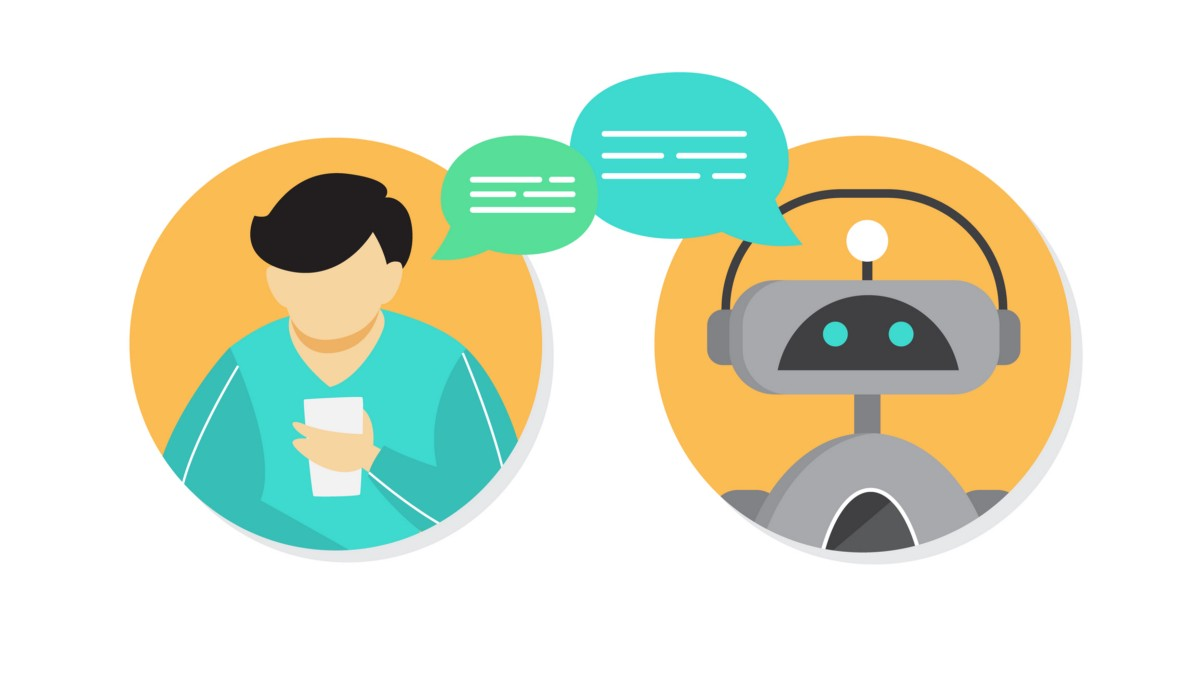

# **PART 0. Question-Answering Task 이해하기**

* **Question Answering 이란?**
> 1. 자연어 처리 업무에서 사용되는 작업으로, 요구된 질문에 정확한 답안을 추출하거나 생성해 내는 과정을 의미합니다. 일반적으로 Machine Reading Comprehension (기계 독해) 작업의 한 형태로 볼 수 있습니다.
> 2. Question Answerings은 사용자가 질문을 하면 컴퓨터가 지식 베이스에서 관련 정보를 탐색하고 이를 요약하여 답변을 제공하는 것을 목표로 합니다. 주어진 질문에 대한 답변은 주어진 문서 내에서 추출될 수도 있고 문서 외부의 지식 베이스를 참조하여 생성될 수 있습니다.
> 3. Question Answering은 다양한 분야에서 사용될 수 있습니다. 전문 지식 검색 엔진 개발 뿐만 아니라, 웹 검색에서 특정 질문에 대한 정확한 답변을 추출하여 사용자에게 제공하거나, 지식 베이스를 기반으로 고객 지원 자동화 시스템을 구축하여 자동으로 답변을 제공하는 데에 활용될 수 있습니다. 또한 문서 요약, 기계 독해 대회나 질문 답변 데이터셋에서 성능을 측정하는 벤치마크로도 사용됩니다.
> 4. Question Answering은 Transformer 아키텍처를 기반으로 한 BERT, RoBERTa, DistillBert 등의 모델들로 큰 발전을 이루었습니다. 이러한 모델은 문맥과 질문을 이해하고 주어진 문서에서 답변을 정확하게 추출하는 데에 뛰어난 성능을 발휘합니다.

* **Question Answering 을 HW5의 테스크로 선정한 이유?**

 > 1. 사람들이 인터넷을 가장 많이 활용하는 이유 중 하나는 질문 검색입니다. 저같은 경우에도 검색으로 하루를 시작할 때가 많은데, 평소 이러한 검색 엔진이 어떠한 데이터들을 기반으로, 어떠한 모델을 학습시켜 시스템이 작동되는지가 궁금했습니다. 따라서 이번 과제를 통해 이러한 궁금증을 해결하고자 Question Answering을 과제 Task로 선정하였습니다.
 > 2. 또한 Question Answering 는 다른 NLP task (ex. Summarization, Table Question Answering, Translation, Token Classification) 의 가장 기본이 되는 중요한 Task 입니다. QA task는 **문맥 이해와 추론**, **정보 검색과 추출**, **언어 이해와 생성**을 비롯한 다양한 능력들을 핵심적으로 훈련하고 사용합니다. 따라서, QA task는 다른 NLP 태스크들의 기본적인 요소를 포함하고 있으며, 앞서 언급한 문맥 이해, 추론, 정보 검색 및 추출, 언어 이해와 생성 능력 등의 측면에서 다른 태스크들과 유사한 핵심 요소를 공유합니다. 이러한 이유로 Question Answering은 다른 NLP 태스크들과의 관련성과 중요성이 높다고 할 수 있습니다.


 * **Bert 모델을 활용한 Question Answering 의 중요성**
 > 검색을 통한 정확하고 신속한 정보를 얻기 위해서는 Bert 모델을 기반으로 한 Question Answering 모델은 매우 중요합니다. 미리 학습된 모델을 사용하여 질문과 답변의 관계를 학습하고, 이를 토대로 새로운 질문에 대한 답변을 예측하는 과정을 통해, 정확성과 일반화 능력을 향상시킬 수 있으며, 인터넷 검색 결과의 품질과 신뢰성 역시 높일 수 있습니다. 또한, 인공지능 알고리즘 중에서도 특히 Bert 모델에 대한 끊임없는 연구와 개선이 진행되고 있기 때문에 앞으로도 지속적인 업데이트와 발전이 이루어진 알고리즘을 제공할 수 있을 것이라 예상됩니다.

 * **Question Answering의 중요한 하위 문제**
 > 1. **Open-retrieval QA** (검색 기반 질의응답): Open-retrieval QA는 대규모 문서 집합에서 적절한 답변을 검색하는 과제입니다. 일반적으로 온라인 백과사전이나 대량의 문서 집합 (예: 위키피디아)을 활용하여 작동합니다. 이 방식에서는 주어진 질문과 관련된 문서를 검색한 후, 해당 문서에서 정확한 답변을 찾아내는 것이 목표입니다. 일반적으로 검색 모델과 문서 판독기 모델이 조합되어 사용됩니다. 검색 모델은 주어진 질문에 대해 가장 관련성이 높은 문서를 검색하고, 문서 판독기 모델은 해당 문서에서 정확한 답변을 추출합니다.
 > 2. **Reading comprehension** (독해력): Reading comprehension은 자연어 처리와 인공지능 분야에서 중요한 주제로 다루어지며, 기계 학습 및 딥러닝 모델을 사용하여 자동화된 독해력 시스템을 개발하는 데에 활용됩니다. 이러한 시스템은 대규모의 문서나 텍스트 데이터를 처리하여 질문에 대한 답변을 추출하거나 예측하는 데 사용될 수 있습니다. Reading comprehension의 표준 접근 방식은 BERT와 같은 사전 훈련된 모델을 기반으로 구축됩니다. 모델은 질문과 후보 단락을 입력으로 받고, 질문에 대답 가능한지를 예측하도록 훈련되며 (일반적으로 [CLS] 토큰과 관련된 표현을 사용), 각 토큰이 답 구간의 시작 또는 끝인지를 예측합니다.

 👉 따라서, Open-retrieval QA는 검색 기반 질의응답 방식으로 질문에 대한 답변을 검색하여 찾는 것이고, Reading comprehension은 독해력 시스템을 구축하여 문서에서 질문에 대한 답변을 추출하거나 예측하는 것을 목표로 합니다. 이 두 가지 방식은 QA 시스템에서 중요한 역할을 수행하며, 각각의 목적과 활용 분야에 따라 다양한 방법과 모델이 사용됩니다.

* **Question Answering의 대표적인 2가지 방식**
> 1. **Knowledge-based question answering**: 지식 기반 질의응답은 질문에 대한 답변을 찾기 위해 **지식 베이스나 데이터베이스와 같은 지식을 활용**하는 방식입니다. 질문을 의미 표현으로 파싱하고, 해당 의미 표현을 지식을 담고 있는 데이터베이스에 대해 실행하여 적절한 답변을 찾습니다.
> 2. **IR-based question answering**: 정보 검색 기반 질의응답은 관련 있는 문서나 패시지를 선별하여 질문에 대한 답변을 찾는 방식입니다. 먼저 관련된 문서들을 선별한 후, 해당 문서들 내에서 질문에 대한 답변이 될 수 있는 패시지를 찾아내고 추출합니다. 이를 위해 정보 검색 기술을 사용하여 문서의 랭킹을 결정하고, 답변 추출을 위한 패시지 랭킹을 수행합니다.

 👉 즉, 지식 기반 질의응답은 데이터베이스와 지식을 활용하여 질문에 대한 답변을 찾고, 정보 검색 기반 질의응답은 문서나 패시지를 검색하여 답변을 추출합니다. 두 가지 방식은 각각의 특성과 장점을 가지고 있으며, 사용되는 데이터와 지식의 종류, 그리고 질의응답 시스템의 목적과 사용 환경에 따라 선택될 수 있습니다.

* **Question Answering을 위한 간단한 Pipeline**
> 1. 입력 질문(Question)과 대상 테스트(문단)를 받습니다.
> 2. Bert를 사용하여 입력 테스트에 대한 토큰화를 진행하고, 토큰 임베딩을 생성합니다.
> 3. 생성 완료한 토큰 임베딩을 Bert 모델의 시작 토큰 분류기와 종료 토큰 분류기에 입력하여 시작 로짓과 종료 로짓에 대한 정보를 얻습니다.
> 4. 시작 로짓과 종료 로짓을 사용하여 가장 가능성이 높은 (확률이 높은) 시작 위치와 종료 위치를 예측합니다.
> 5. 예측된 시작 위치와 종료 위치를 사용하여 원본 텍스트에서 정답을 예측하여 추출합니다.

 👉 즉, 입력 질문과 대상 테스트를 받아서 Bert 모델을 통해 예측을 수행하고, 최종적으로 질문에 대한 정답을 출력하는 일련의 처리 과정을 의미합니다.




# **Part 1. Bert 기반 Question Answering 시스템 이해하기**

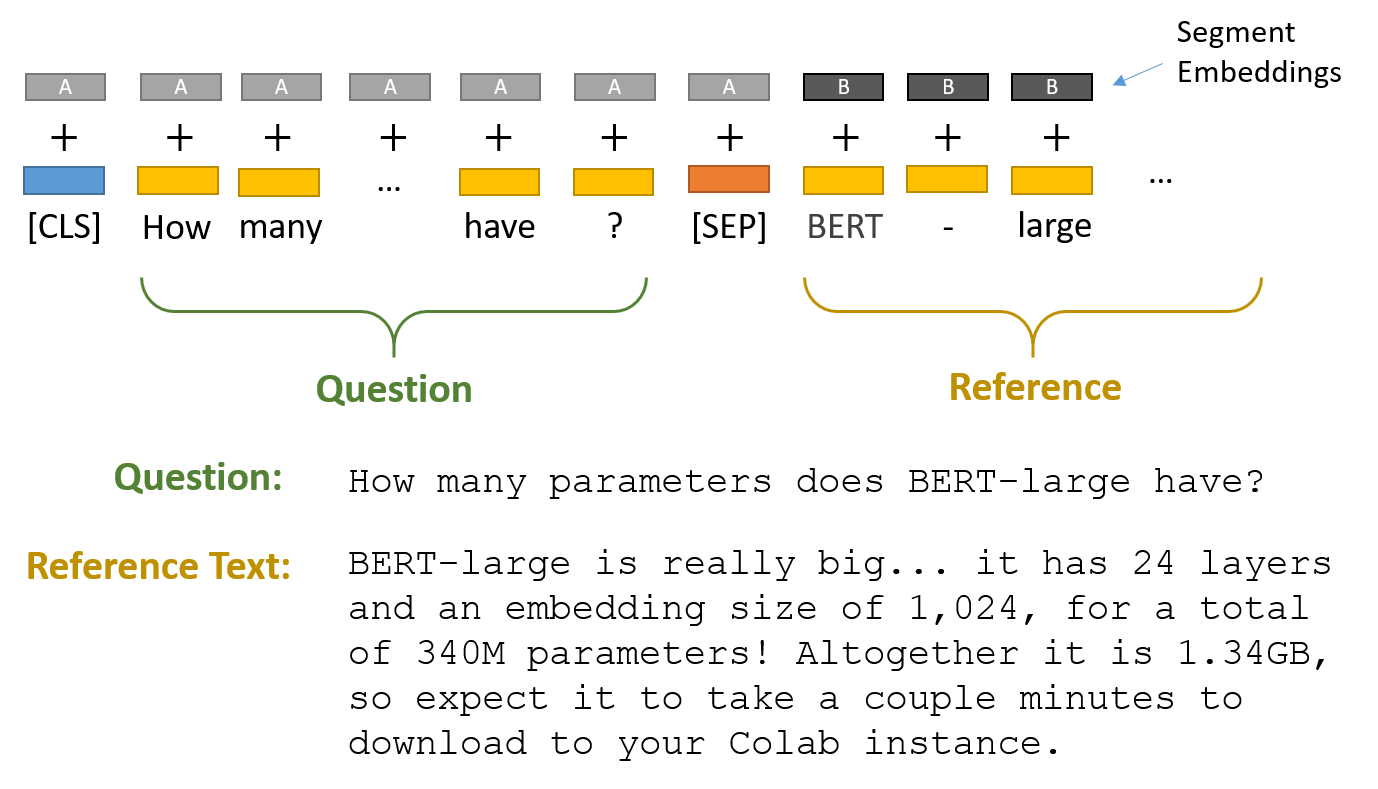

* **BERT 입력 형식** -> QA 작업을 BERT에 입력하기 위해서는, 질문(Question)과 참조(Reference) 텍스트를 입력으로 포합시킵니다. 두 개의 텍스트는 [SEP] 토큰으로 구분됩니다.
*  BERT는 "**Segment Embeddings**"을 사용하여 질문과 참조 텍스트를 구분합니다. 이는 BERT가 학습한 두 개의 임베딩(A & B segment)으로, 토큰 임베딩에 추가하여 입력 레이어로 전달됩니다.

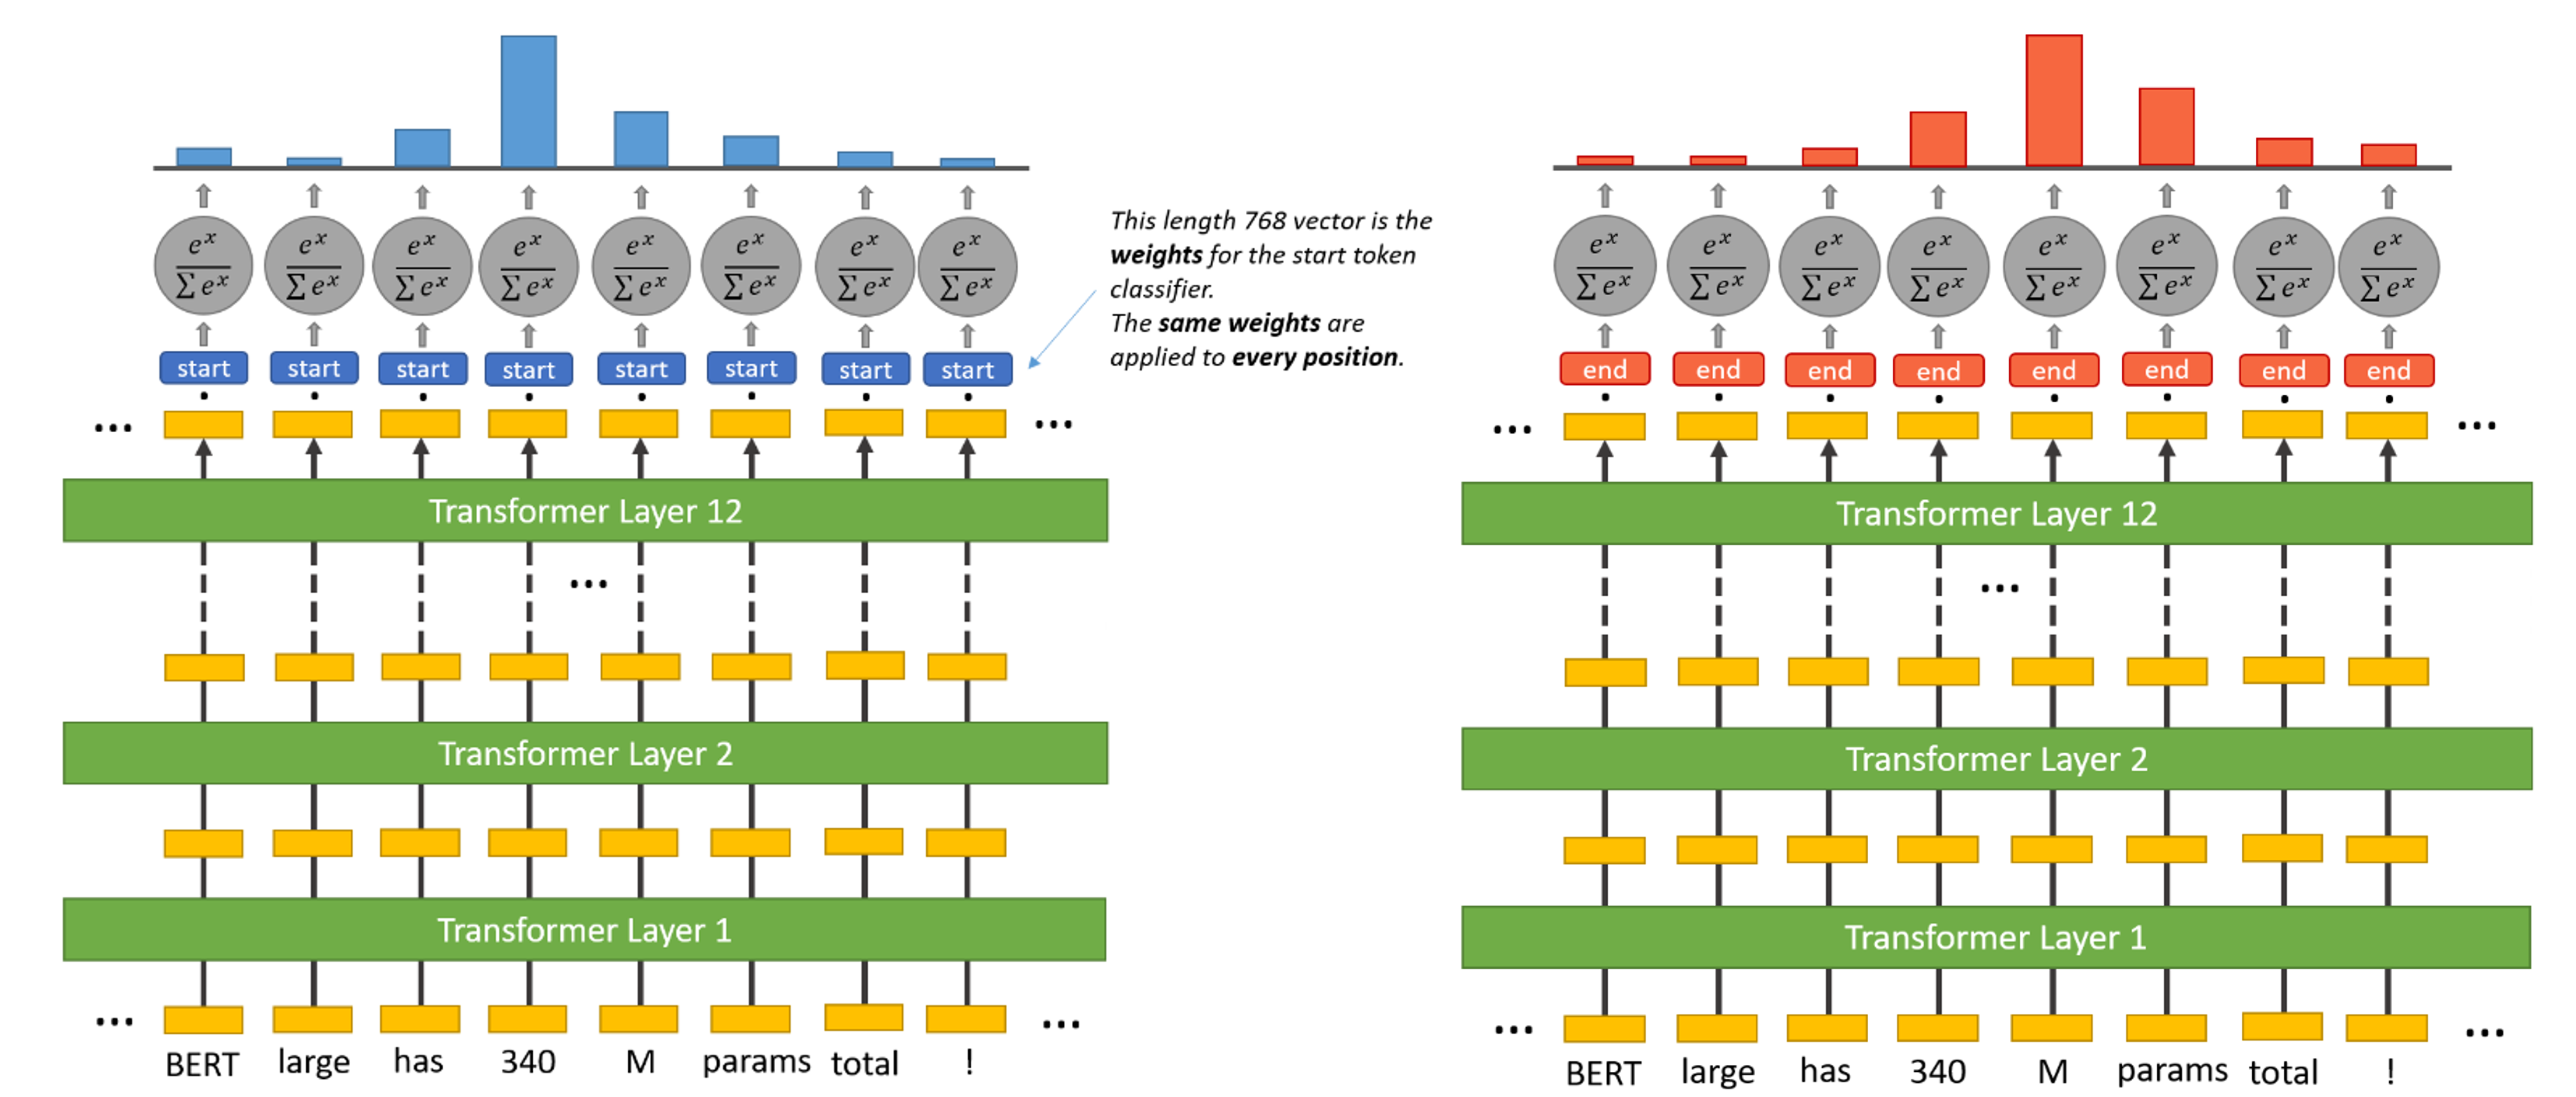

* **시작 및 종료 토큰 분류기 (Start & End Token Classifiers)**
> BERT는 답변을 포함한 "span" 텍스트를 강조해야 합니다. 이는 어떤 토큰이 답변의 시작을 나타내고, 어떤 토큰이 답변의 끝을 나타내는지에 대한 예측으로 표현됩니다.
> 1. 텍스트의 각 토큰에 대한 최종 임베딩을 시작 토큰 분류기에 입력합니다. 시작 토큰 분류기는 모든 단어에 적용되는 단일 가중치(same weights) 세트를 가지고 있습니다. 이들은 출력 임베딩과 동일한 차원을 가지고 있습니다.
> 2. 출력 임베딩과 시작 토큰 가중치 사이의 내적(dot product)을 수행한 후, softmax 활성화 함수를 적용하여 모든 단어에 대한 확률 분포를 생성합니다. (출력값을 확률값으로 변환하는 과정) 확률 분포를 기반으로, 시작 토큰으로 선택될 확률이 가장 높은 단어를 선택합니다.
> 3. 종료 토큰은 시작 토큰과 달리 별도의 가중치 벡터가 존재합니다. 종료 토큰에 대해서도 종료 토큰 가중치 집합과 출력 임베딩 사이의 내적(dot product)를 계산합니다. 그런 다음 softmax를 거쳐 확률 분포를 생성합니다. 해당 과정을 거친 후 가장 높은 확률을 가진 토큰이 종료 토큰으로 선택됩니다.
> 4. 이 과정에서 종료 토큰이 시작 토큰보다 먼저 나타날 수도 있습니다. 이 경우 예측된 답변으로 빈 문자열이 출력됩니다.

# **Part 2. Example Code 💻**

위에서 소개한 내용을 실제 코드로 구현해 보겠습니다. Hugging Library 에서 Question Answering을 위해 미세 조정된 모델을 다운로드하여 적용해 보았습니다.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.8 MB/s eta 0:00:00


# **1. Tokenizer and model 로드**

In [ ]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import warnings
warnings.simplefilter("ignore")

weight_path = "kaporter/bert-base-uncased-finetuned-squad" # bert 모델 로드
# loading tokenizer
tokenizer = BertTokenizer.from_pretrained(weight_path)
#loading the model
model = BertForQuestionAnswering.from_pretrained(weight_path)

# **2. QA example 로 token_ids 생성**

* 데이터셋을 사용하여 모델 훈련해 보기 전에 finetuned된 bert(bert-base) 모델을 사용하여 예측하는 방법 확인

* **3가지 Bert-inputs embedding**

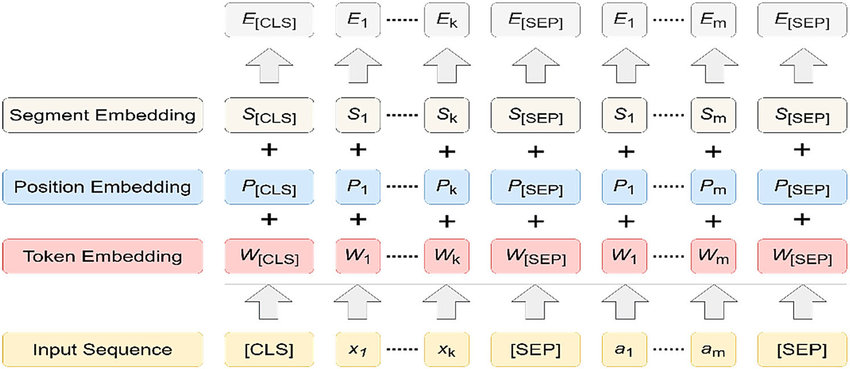
> 1. **Token(Word piece) embedding**: BERT는 입력 문장을 작은 단위인 subword 또는 word piece로 분할하여 처리합니다. 이 단어 조각들은 BERT의 단어 임베딩 과정에서 임베딩 벡터로 변환됩니다. 예를 들어, "apple"이라는 단어는 "ap"와 "##ple"로 분할될 수 있습니다. 이를 통해 BERT는 out-of-vocabulary (OOV) 단어에 대해서도 처리할 수 있습니다.
> 2. **Positional embedding**: BERT는 문장 내 단어의 위치 정보를 전달하기 위해 positional embedding을 사용합니다. 문장 내 단어의 순서를 표현하기 위해 각 단어의 임베딩에 위치 정보를 추가합니다. 이를 통해 BERT는 문장의 구조와 순서를 파악할 수 있습니다.
> 3. **segmentation embedding**: BERT는 두 개의 문장을 구분하기 위해 segmentation embedding을 사용합니다. 예를 들어, 질문과 해당 질문에 대한 답변을 구분하기 위해 segmentation embedding을 추가합니다. 첫 번째 문장은 "0"의 임베딩을, 두 번째 문장은 "1"의 임베딩을 할당하여 구분합니다. 이를 통해 BERT는 다중 문장 입력을 처리하고 문장 간 관계를 이해할 수 있습니다.

👉 이러한 임베딩들은 BERT 모델의 입력으로 사용되며, 단어, 위치 및 구분 정보를 통합하여 각 토큰의 최종 임베딩 벡터를 생성합니다. token embedding, Positional embedding은 모델 내에서 생성(Hugging Face 처리)되기 때문에, Segmentation embedding만 처리하면 됩니다.

In [ ]:
question = "How many parameters does BERT-large have?"
context = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."

input_ids = tokenizer.encode(question, context)
print (f'We have about {len(input_ids)} tokens generated')

tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(" ")
print('Some examples of token-input_id pairs:')

for i, (token,inp_id) in enumerate(zip(tokens,input_ids)):
    print(token,":",inp_id)


We have about 70 tokens generated
 
Some examples of token-input_id pairs:
[CLS] : 101
how : 2129
many : 2116
parameters : 11709
does : 2515
bert : 14324
- : 1011
large : 2312
have : 2031
? : 1029
[SEP] : 102
bert : 14324
- : 1011
large : 2312
is : 2003
really : 2428
big : 2502
. : 1012
. : 1012
. : 1012
it : 2009
has : 2038
24 : 2484
- : 1011
layers : 9014
and : 1998
an : 2019
em : 7861
##bed : 8270
##ding : 4667
size : 2946
of : 1997
1 : 1015
, : 1010
02 : 6185
##4 : 2549
, : 1010
for : 2005
a : 1037
total : 2561
of : 1997
340 : 16029
##m : 2213
parameters : 11709
! : 999
altogether : 10462
it : 2009
is : 2003
1 : 1015
. : 1012
34 : 4090
##gb : 18259
, : 1010
so : 2061
expect : 5987
it : 2009
to : 2000
take : 2202
a : 1037
couple : 3232
minutes : 2781
to : 2000
download : 8816
to : 2000
your : 2115
cola : 15270
##b : 2497
instance : 6013
. : 1012
[SEP] : 102


In [ ]:
sep_idx = tokens.index('[SEP]')

# we will provide including [SEP] token which seperates question from context and 1 for rest.
token_type_ids = [0 for i in range(sep_idx+1)] + [1 for i in range(sep_idx+1,len(tokens))]
print(token_type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Run our example through the model.
out = model(torch.tensor([input_ids]), # The tokens representing our input text.
                token_type_ids=torch.tensor([token_type_ids]))

start_logits,end_logits = out['start_logits'],out['end_logits'] # 시작 답변, 종료 답변
# 확률분포를 이용해 가장 높은 확률을 시작, 종료 답변으로 채택
answer_start = torch.argmax(start_logits)
answer_end = torch.argmax(end_logits)

ans = ''.join(tokens[answer_start:answer_end])
print('Predicted answer:', ans)

Predicted answer: 340


In [ ]:
del model
del tokenizer

# **3. library 로드**

In [ ]:
import transformers
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore")

# **4. Dataset 로드 & SQuAD 살펴보기**

* **QA 작업에서 많이 사용되는 Dataset 종류**
> 1. **MS MARCO (Microsoft Machine Reading Comprehension)**: MS MARCO는 Microsoft에서 제공하는 대규모 Machine Reading Comprehension 데이터셋입니다. 이 데이터셋은 질문과 특정 문서에 대한 정답을 포함하고 있으며, 웹 검색 결과에서 추출되었습니다.
> 2. **SQuAD**(**S**tanford **Qu**estion **A**nswering **D**ataset):  SQuAD는 Stanford University에서 개발한 가장 인기 있는 데이터셋으로, 여러 개의 텍스트 문단, 해당 문단과 관련된 다양한 질문(Wikipedia의 문단에서 추출), 그에 대한 답변 및 정답이 포함된 답변의 시작 인덱스를 포함하고 있습니다. SQuAD에는 SQuAD1.1과 SQuAD2.0이라는 두 가지 버전이 있으며, 주요 차이점은 SQuAD2.0에는 답변 가능한 질문과 유사한 형태의 답변 불가능한 질문이 50,000개 이상 포함되어 있다는 점입니다. 따라서 SQuAD2.0에서 우수한 성과를 내기 위해서는 시스템이 가능한 경우에만 질문에 답변하는 것뿐만 아니라, 문단에서 답변을 지원하지 않는 경우를 판단하고 답변을 하지 않아야 합니다. 두 데이터셋 모두 공개적으로 제공되며 다음 링크에서 다운로드할 수 있습니다. 여기서는 SQuAD2.0을 사용하겠습니다.
> 3. **CoQA (Conversational Question Answering)**: CoQA는 대화형 Question Answering을 위한 데이터셋으로, 질문과 해당 질문에 대한 답변으로 구성된 대화 형태의 문서로 이루어져 있습니다. 이 데이터셋은 실제 대화 형식의 질문과 답변을 포함하고 있어 실제 응용 분야에서의 상호 작용에 적합합니다.
> 4. **QuAC (Question Answering in Context)**: QuAC는 대화형 문맥에서의 Question Answering을 위한 데이터셋입니다. 이 데이터셋은 개별적인 문서가 아닌, 문맥 정보를 포함하는 대화 세트로 구성되어 있습니다. 질문에 대한 답변은 전체 대화의 맥락을 고려해야 합니다.
> 5. **TriviaQA**: TriviaQA는 지식 기반 질문에 대한 정답을 포함하는 데이터셋입니다. 이 데이터셋은 Wikipedia, 인터넷 검색 결과 및 기타 소스에서 추출되었으며, 다양한 주제와 난이도의 질문을 포함하고 있습니다.

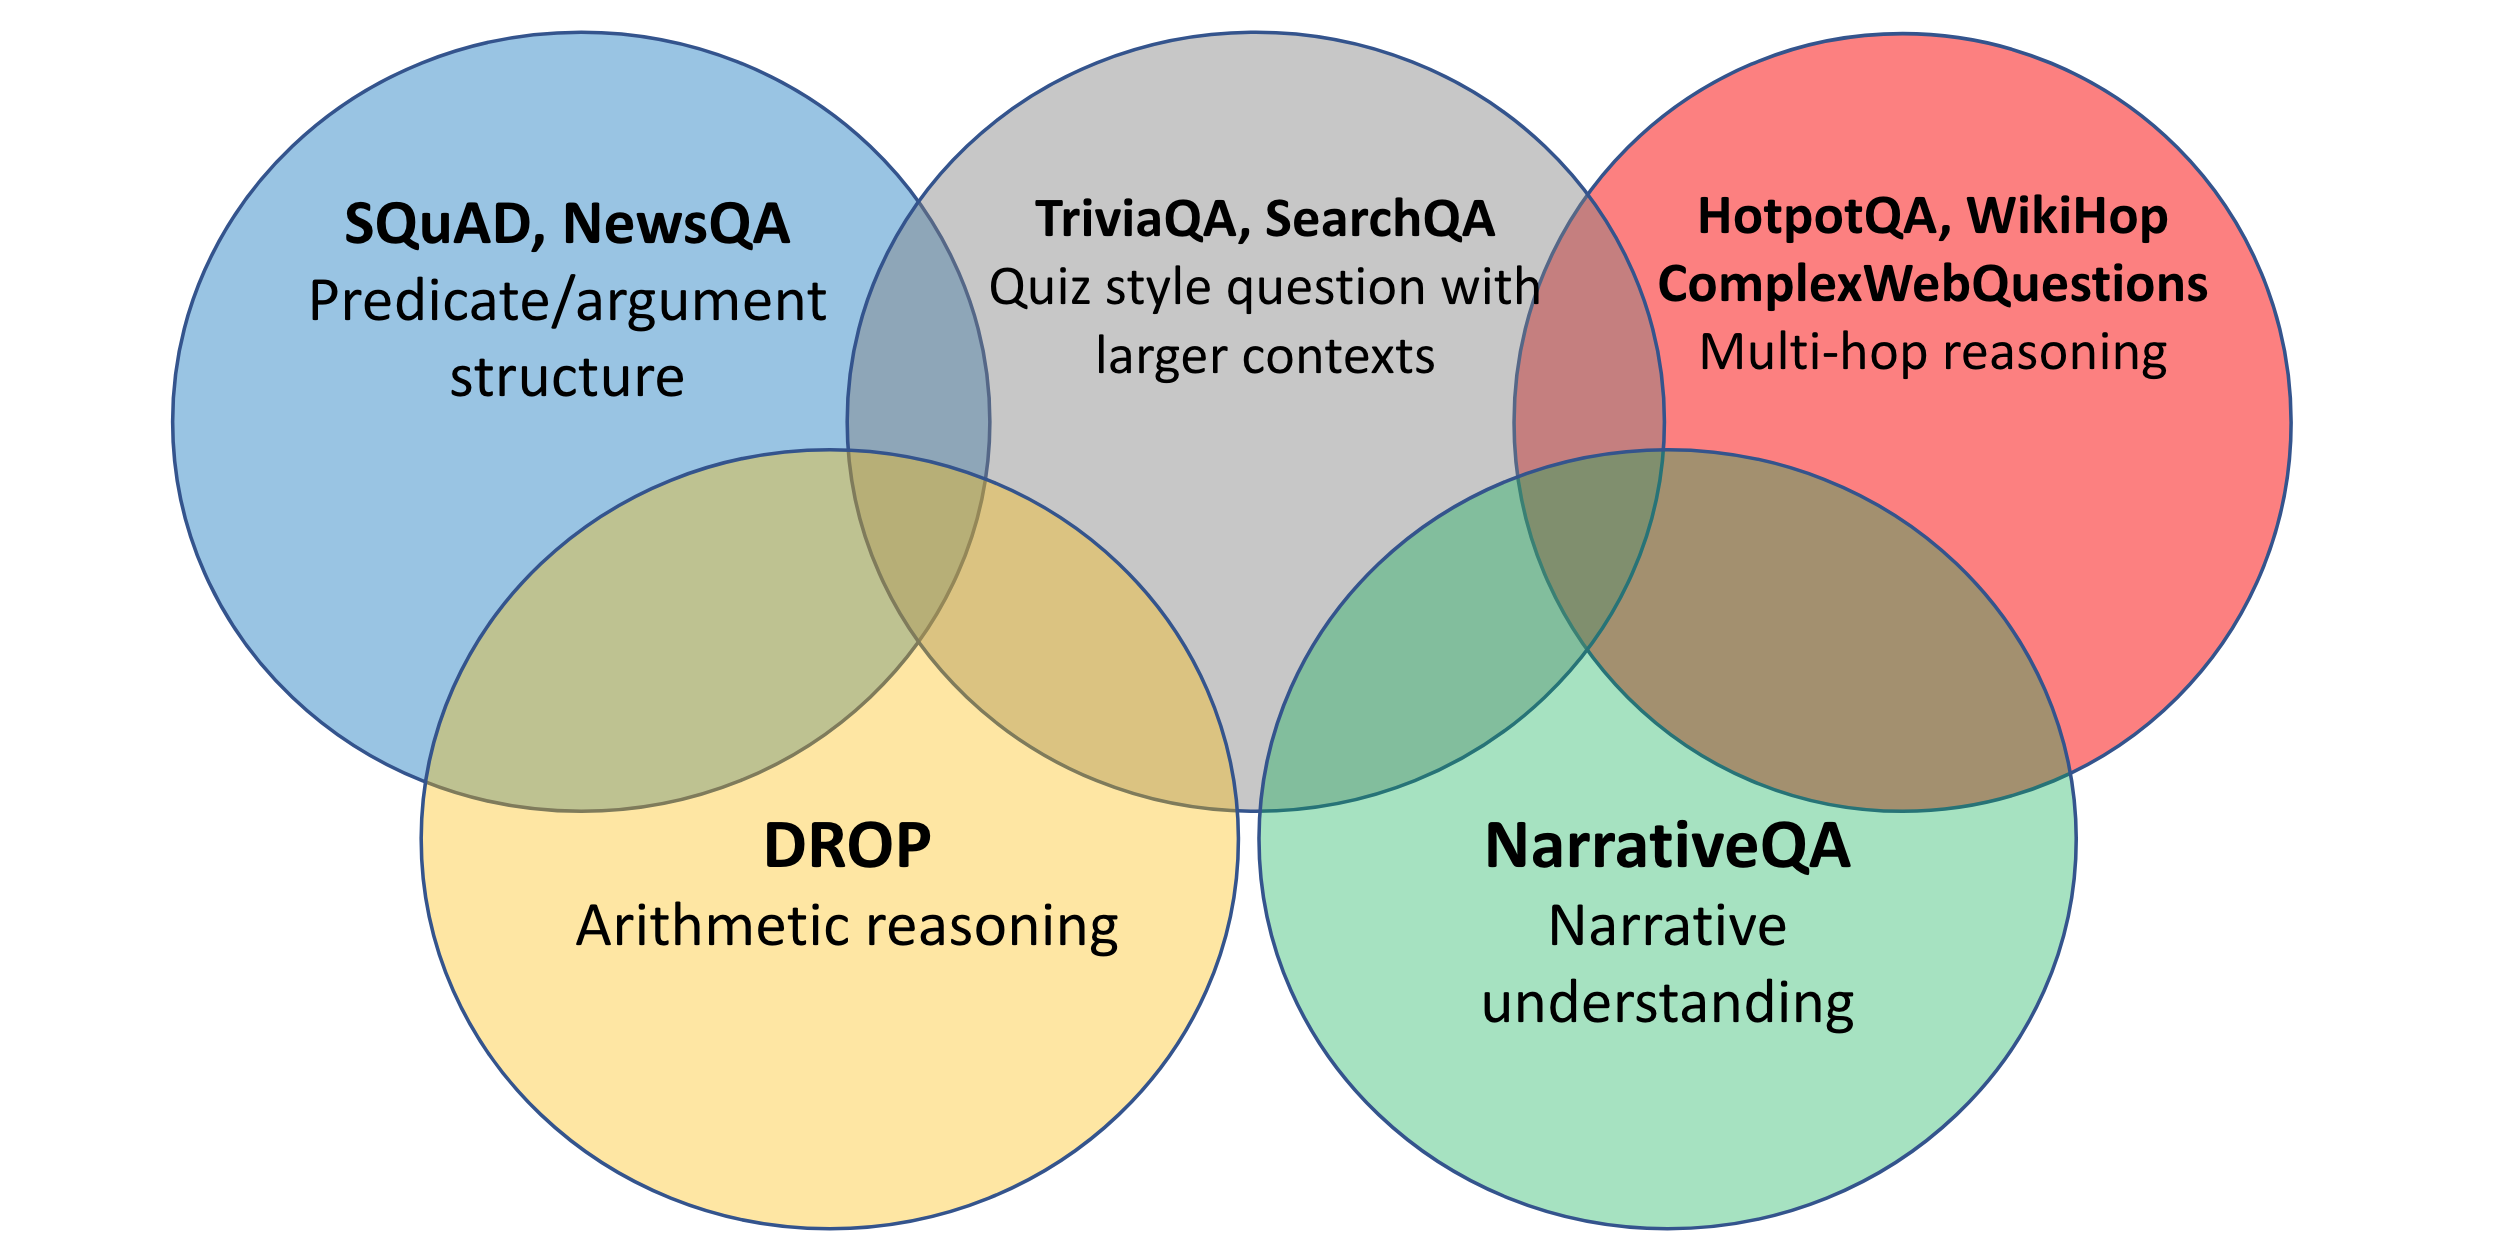

* 해당 과제에서 선택한 Dataset: **SQuAD**
> 1. SQuAD의 각 데이터 포인트는 문서, 질문, 정답으로 구성되기 때문에, DistilBERT 또는 BERT 모델의 입력 형식에 맞게 데이터를 변환해야 합니다. 일반적으로 입력은 토큰으로 분할되고, 토큰의 인덱스, 세그먼트 임베딩, 마스크 등의 추가 정보를 포함합니다.
> 2. **plain_text 구성**
  * id: a string feature
  * title: a string feature.
  * context: a string feature.
  * question: a string feature.
  * answers: a dictionary feature containing:
  * text: a string feature.
  * answer_start: a int32 feature.
> 3. **Data Splits**
  * train: 87599 개
  * test: 10570 개

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
dataset = load_dataset("squad")
dataset

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

1. load_dataset() 덕분에 데이터셋을 한번에 다운로드하고 캐시할 수 있습니다.
2. 훈련 데이터에는 약 87,599개의 데이터 포인트가 있고, 검증 데이터에는 10,570개의 데이터 포인트가 있습니다. 몇 가지 샘플을 살펴보겠습니다.

> 예시 1:
* 문장: "BERT는 어떻게 작동합니까?"
* 질문: "BERT는 무엇을 사용하여 작동합니까?"
* 정답: "BERT"
* 시작 위치: 2
* 끝 위치: 2


> 예시 2:
* 문장: "사과는 어떤 색인가요?"
* 질문: "어떤 과일인가요?"
* 정답: "사과"
* 시작 위치: 0
* 끝 위치: 0


> 예시 3:
* 문장: "집에서 공부하고 있어요."
* 질문: "어디에서 공부하고 있나요?"
* 정답: "집"
* 시작 위치: 1
* 끝 위치: 1

이와 같이 훈련 데이터와 검증 데이터에서 랜덤으로 선택된 몇 가지 샘플을 확인할 수 있습니다. 이러한 데이터를 사용하여 BERT 모델을 훈련하고 검증하여 질문에 대한 정답 위치를 예측할 수 있습니다.

In [ ]:
print("Context: ", dataset["train"][0]["context"])
print("Question: ", dataset["train"][0]["question"])
print("Answer: ", dataset["train"][0]["answers"])

Context:  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question:  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer:  {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


In [ ]:
# to make text bold
s_bold = '\033[1m'
e_bold = '\033[0;0m'

print(s_bold + 'Train Data Sample.....' + e_bold)
train_data = dataset["train"]
for data in train_data:
    print(' ')
    print(s_bold + 'ID -' + e_bold, data['id'])
    print(s_bold +'TITLE - '+ e_bold, data['title'])
    print(s_bold + 'CONTEXT - '+ e_bold,data['context'])
    print(s_bold + 'ANSWERS - ' + e_bold,data['answers']['text'])
    print(s_bold + 'ANSWERS START INDEX - ' + e_bold,data['answers']['answer_start'])
    print(' ')
    break

print('---'*30)
print(s_bold + 'Validation Data Sample.....' + e_bold)
train_data = dataset["validation"]
for data in train_data:
    print(' ')
    print(s_bold + 'ID -' + e_bold, data['id'])
    print(s_bold +'TITLE - '+ e_bold, data['title'])
    print(s_bold + 'CONTEXT - '+ e_bold,data['context'])
    print(s_bold + 'ANSWERS - ' + e_bold,data['answers']['text'])
    print(s_bold + 'ANSWERS START INDEX - ' + e_bold,data['answers']['answer_start'])
    print(' ')
    break

Train Data Sample.....
 
ID - 5733be284776f41900661182
TITLE -  University_of_Notre_Dame
CONTEXT -  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
ANSWERS -  ['Saint Bernadette Soubirous']
ANSWERS START INDEX -  [515]
 
------------------------------------------------------------------------------------------
Validation Data Sample.....
 
ID - 56be4

Bert 모델의 입력은 토큰 임베딩, 위치 임베딩 및 세그먼트 임베딩의 합으로 구성됩니다. 질문 응답 시스템을 위한 입력 형식은 위의 사진에서 확인할 수 있는 것처럼, **[CLS] 질문 [SEP] 문맥 [SEP] 형태**가 됩니다.

In [ ]:
dataset["train"].filter(lambda x: len(x["answers"]["text"]) != 1)

Filter:   0%|          | 0/87599 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

In [ ]:
dataset["validation"].filter(lambda x: len(x["answers"]["text"]) != 1)

Filter:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 10567
})

**Dataset.filter()**는 Hugging Face의 Datasets 라이브러리에서 제공되는 메서드입니다. 이 메서드는 데이터셋을 필터링하는 데 사용됩니다. 예를 들어, 특정 조건을 만족하는 데이터 포인트만 선택하고자 할 때 사용할 수 있습니다.

filter() 메서드는 **조건 함수**를 인자로 받으며, 이 함수는 각 데이터 포인트를 입력으로 받아서 참(True) 또는 거짓(False) 값을 반환해야 합니다. filter() 메서드는 조건을 만족하는 데이터 포인트로 구성된 새로운 데이터셋을 반환합니다.

학습 데이터셋인 train에는 모든 샘플에 대해 하나의 답변만 있는 것을 확인할 수 있습니다. 그러나 검증 데이터셋인 validation에는 여러 개의 답변이 있는 10567개의 샘플이 있습니다.

따라서 위와 같은 방식으로 filter() 메서드를 사용하여 훈련 데이터셋에서 답변의 개수가 1이 아닌 데이터 포인트(다중 답변이 있는 데이터 포인트)를 필터링할 수 있다. (학습 과정에서는 하나의 답변만 가능하기 때문)

In [ ]:
print(dataset["validation"][2]["context"])
print(dataset["validation"][2]["question"])

In [ ]:
## Lets sample some dataset so that we can reduce training time.
dataset["train"] = dataset["train"].select([i for i in range(8000)])
dataset["validation"] = dataset["validation"].select([i for i in range(2000)])
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 8000
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 2000
    })
})

# **5. Question-Answering 시스템에 필요한 data processing**

* 답변에 해당하는 토큰의 시작 및 종료 위치가 될 질문의 답변에 대한 레이블을 생성하는 것이 가장 큰 과제
* Bert 모델의 입력은 토큰 임베딩 + 위치 임베딩 + 세그먼트 임베딩
* Tokenizer 에 질문과 컨텍스트를 함께 전달할 수 있으며 특수 토큰을 적절하게 삽입하여 다음과 같은 문장을 형성합니다: **[CLS] question [SEP] context [SEP]**
* 레이블이 답변의 시작 및 종료 토큰 인덱스가 되며, 모델은 입력에서 토큰당 하나의 시작 및 종료 로짓을 예측하는 작업 수행
* 학습에는 bert 모델에 비해 용량이 적고 속도가 빠른 (가벼운) **distilbert** 이용

* **데이터셋 레이블 지정 방법**
> * Bert는 답변이 포함된 토큰의 범위를 알아야 합니다. 질문 응답 시스템에서 각 입력 토큰에 대해 시작 위치와 종료 위치라는 두 개의 출력이 필요합니다. 이 출력은 (0,0), (1,0) 또는 (0,1)일 수 있습니다. 즉, 각 레이블은 1 또는 0일 수 있습니다.
> * 입력 토큰 중 답변 **시작** 토큰에 해당하는 부분에는 **(1,0)**으로 레이블을 지정합니다.
> * 답변 **종료** 토큰에 해당하는 부분에는 **(0,1)**으로 레이블을 지정합니다.
> * 다른 모든 토큰 (답변에 속하지 않는 모든 토큰) 에는 **(0,0)** 레이블을 지정합니다.
> * 답변 시작 인덱스만 있거나 답변 종료 인덱스만 있을 때도 마찬가지입니다.
> *  Hugging Face는 이러한 작업을 자동으로 처리해 주기 때문에, 우리는 입력에 해당하는 시작 인덱스와 종료 인덱스를 전달하기만 하면 됩니다. 만약 문맥에 답변이 없는 경우에는 시작과 종료 위치를 0으로 설정해주어야 합니다.


* **시작/종료 위치 찾는 방법 예시**
>```
start token eg: [0.2, 0.4 ,0.3 , 0.5, 0.6, 0.4, 0.1, 0.3, 0.2, 0.4, 0.3, 0.5 ,0.9 , 0.6, 0.7, 0.8, 0.23, 0.31, 0.12]
end token eg: [0.3, 0.1 ,0.5 , 0.5, 0.3, 0.2, 0.1, 0.13, 0.22, 0.61, 0.23, 0.51 ,0.4 , 0.83, 0.45, 0.12, 0.3, 0.51, 0.22]
```
> * 예측 시에는 각 시작 위치와 종료 위치에 대한 확률 예측값이 제공됩니다. 따라서 가장 높은 확률을 가진 시작 위치와 종료 위치를 찾을 수 있습니다. 위의 경우에는 start_position = 12, end_position = 14입니다.  

* **QA 작업에서 긴 context 를 처리하는 방법**
> 문맥이 매우 긴 경우를 처리하는 경우, 잘려진 문맥에서 답변이 잘리고 문맥에서 답변이 누락되는 문제가 발생할 수 있습니다. 이러한 문제를 해결하기 위해서는 문맥 간의 충분한 중첩 (문맥을 작은 조각으로 나눌 때 겹치는 부분을 형성) 을 추가하여 답변이 잘릴 가능성을 최소화하고 답변이 여러 조각에 걸쳐 나뉘어지더라도 정보의 일부가 여러 조각에 포함되도록 합니다. 중첩된 조각을 생성하는 것은 Tokenizer에 의해 수행되며, 일반적으로 stride 또는 overlap 매개변수를 조절하여 중첩 정도를 조절할 수 있습니다. 중첩 정도는 문맥의 길이와 관련이 있으며, 충분한 중첩을 추가함으로써 답변을 더 정확하게 추출할 수 있습니다.

In [ ]:
from transformers import AutoTokenizer

# model_checkpoint = "bert-base-cased"
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

trained_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)

context = dataset["train"][0]["context"]
question = dataset["train"][0]["question"]
answer = dataset["train"][0]["answers"]["text"]


inputs = tokenizer(
    question,
    context,
    max_length=160,
    truncation="only_second",  # only to truncate context
    stride=70,  # no of overlapping tokens  between concecute context pieces
    return_overflowing_tokens=True,  #to let tokenizer know we want overflow tokens
)


print(f"The 4 examples gave {len(inputs['input_ids'])} features.")
print(f"Here is where each comes from: {inputs['overflow_to_sample_mapping']}.")

print('Question: ',question)
print(' ')
print('Context : ',context)
print(' ')
print('Answer: ', answer)
print('--'*30)

for i,ids in enumerate(inputs["input_ids"]):
    print('Context piece', i+1)
    print(tokenizer.decode(ids[ids.index(102):]))
    print(' ')

The 4 examples gave 2 features.
Here is where each comes from: [0, 0].
Question:  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
 
Context :  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
 
Answer:  ['Saint Bernadette Soubirous']
--------------------------------------------------
Context piece 1
[SEP] architecturally, the s

**tokenizer 설정**
> 1. max_length=160: 최대 길이를 160 설정합니다.
> 2. truncation="only_second": 컨텍스트가 포함된 질문이 너무 길 때 컨텍스트(두 번째 위치에 있음)를 자릅니다.
> 3. stride=70: 두 개의 연속 청크 사이에 겹치는 토큰 수를 70개로 설정합니다.
> 4. return_overflowing_tokens=True: 최대 길이를 초과하는 문장에서 잘린 부분을 유지합니다. (잘린 부분을 추가적으로 반환하여 유지할 수 있도록 설정, 이를 False로 설정하면 잘린 부분은 손실)

* 위 예시에서는 SEP3, 4 부분에 답변 포함

In [ ]:
from transformers import AutoTokenizer

del tokenizer
trained_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)

def train_data_preprocess(examples): #전처리 함수

    """
    generate start and end indexes of answer in context
    """

    def find_context_start_end_index(sequence_ids):
        """
        returns the token index in whih context starts and ends
        """
        token_idx = 0
        while sequence_ids[token_idx] != 1:  #means its special tokens or tokens of queston
            token_idx += 1                   # loop only break when context starts in tokens
        context_start_idx = token_idx

        while sequence_ids[token_idx] == 1:
            token_idx += 1
        context_end_idx = token_idx - 1
        return context_start_idx,context_end_idx


    questions = [q.strip() for q in examples["question"]]
    context = examples["context"]
    answers = examples["answers"]

    inputs = tokenizer(
        questions,
        context,
        max_length=512,
        truncation="only_second",
        stride=128,
        return_overflowing_tokens=True,  #returns id of base context
        return_offsets_mapping=True,  # returns (start_index,end_index) of each token
        padding="max_length"
    )


    start_positions = []
    end_positions = []


    for i,mapping_idx_pairs in enumerate(inputs['offset_mapping']):
        context_idx = inputs['overflow_to_sample_mapping'][i]

        # from main context
        answer = answers[context_idx]
        answer_start_char_idx = answer['answer_start'][0]
        answer_end_char_idx = answer_start_char_idx + len(answer['text'][0])


        # now we have to find it in sub contexts
        tokens = inputs['input_ids'][i]
        sequence_ids = inputs.sequence_ids(i)

        # finding the context start and end indexes wrt sub context tokens
        context_start_idx,context_end_idx = find_context_start_end_index(sequence_ids)

        #if the answer is not fully inside context label it as (0,0)
        # starting and end index of charecter of full context text
        context_start_char_index = mapping_idx_pairs[context_start_idx][0]
        context_end_char_index = mapping_idx_pairs[context_end_idx][1]


        #If the answer is not fully inside the context, label is (0, 0)
        if (context_start_char_index > answer_start_char_idx) or (
            context_end_char_index < answer_end_char_idx):
            start_positions.append(0)
            end_positions.append(0)

        else:

            # else its start and end token positions
            # here idx indicates index of token
            idx = context_start_idx
            while idx <= context_end_idx and mapping_idx_pairs[idx][0] <= answer_start_char_idx:
                idx += 1
            start_positions.append(idx - 1)


            idx = context_end_idx
            while idx >= context_start_idx and mapping_idx_pairs[idx][1] > answer_end_char_idx:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

train_sample = dataset["train"].select([i for i in range(200)])

train_dataset = train_sample.map(
    train_data_preprocess,
    batched=True,
    remove_columns=dataset["train"].column_names
)

len(dataset["train"]),len(train_dataset)

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

(8000, 200)

* 토큰화 방법을 사용하면 **데이터 포인트 수 증가**
> * 데이터 포인트란? 데이터셋에서 개별적으로 처리되는 각 샘플을 의미합니다. 각 데이터 포인트는 해당 질문, 문맥 및 답변으로 구성됩니다. 예를 들어, 위의 예시에서는 한 개의 데이터 포인트는 하나의 질문, 하나의 문맥, 그리고 해당 질문에 대한 하나의 답변으로 구성됩니다.
> * 토큰화를 수행하면 원래의 문장이 작은 토큰들로 구성된 형태로 변환됩니다. 따라서 문장을 토큰화하면 데이터 포인트의 수가 증가하는데, 이는 각 문장을 구성하는 토큰의 수가 증가하기 때문입니다. 예를 들어, 하나의 문장이 10개의 토큰으로 구성되었다면, 해당 데이터 포인트는 하나의 문장으로 처리됩니다. 하지만 토큰화를 수행하면 이 문장이 10개의 개별 토큰으로 분할되어 10개의 데이터 포인트로 처리됩니다. 따라서 토큰화를 사용하면 데이터셋의 데이터 포인트 수가 증가하게 됩니다. 이를 확인해 보기 위해 **토큰화 이전과 이후의 값 비교**를 진행해 보겠습니다.

In [ ]:
def print_context_and_answer(idx,mini_ds=dataset["train"]):

    print(idx)
    print('----')
    question = mini_ds[idx]['question']
    context = mini_ds[idx]['context']
    answer = mini_ds[idx]['answers']['text']
    print('Theoretical values :')
    print(' ')
    print('Question: ')
    print(question)
    print(' ')
    print('Context: ')
    print(context)
    print(' ')
    print('Answer: ')
    print(answer)
    print(' ')
    answer_start_char_idx = mini_ds[idx]['answers']['answer_start'][0]
    answer_end_char_idx = answer_start_char_idx + len(mini_ds[idx]['answers']['text'][0])
    print('Start and end index of text: ',answer_start_char_idx,answer_end_char_idx)
    print('----'*20)
    print('Values after tokenization:')


    #answer
    sep_tok_index = train_dataset[idx]['input_ids'].index(102) #get index for [SEP]
    question_ = train_dataset[idx]['input_ids'][:sep_tok_index+1]
    question_decoded = tokenizer.decode(question_)
    context_ = train_dataset[idx]['input_ids'][sep_tok_index+1:]
    context_decoded = tokenizer.decode(context_)
    start_idx = train_dataset[idx]['start_positions']
    end_idx = train_dataset[idx]['end_positions']
    answer_toks = train_dataset[idx]['input_ids'][start_idx:end_idx]
    answer_decoded = tokenizer.decode(answer_toks)
    print(' ')
    print('Question: ')
    print(question_decoded)
    print(' ')
    print('Context: ')
    print(context_decoded)
    print(' ')
    print('Answer: ')
    print(answer_decoded)
    print(' ')
    print('Start pos and end pos of tokens: ',train_dataset[idx]['start_positions'],train_dataset[idx]['end_positions'])
    print('____'*20)


print_context_and_answer(0)
print_context_and_answer(1)
print_context_and_answer(2)
print_context_and_answer(3)

0
----
Theoretical values :
 
Question: 
To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
 
Context: 
Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
 
Answer: 
['Saint Bernadette Soubirous']
 
Start and end index of text:  515 541
--------------------------------------------------------------------------------
Values after tok

# **6. 모델 성능 평가 진행**

먼저, fine-tuning을 진행하지 않은 pre-trained model "distilbert-base-uncased" 의 가중치를 활용하여 모델의 성능을 살펴보겠습니다.
1. 각 샘플의 질문 부분에 대해 offset을 None으로 설정합니다.
2. 각 샘플에 기본 맥락 ID를 추가합니다.
3. 미세 조정되지 않은 bert-base 모델을 사용하여 평가하고 성능을 살펴봅시다.

그 다음, fine-tuning 진행하고 전체 검증 데이터셋에서의 성능 확인

평가에는 Evaluate 라이브러리를 사용합니다. 두 가지 지표를 사용하여 평가합니다.
1. **정확도 (Exact Match)**
2. **F1 스코어**


* **정확도 (Exact Match)**
> 각 질문-답변 쌍에 대해 모델의 예측이 실제 정답과 정확히 일치하는 경우 EM=1이고 그렇지 않으면 0입니다. 부정적인 예제를 평가할 때 모델이 어떠한 텍스트도 예측하지 않으면 해당 예제에 대해 자동으로 0을 받습니다.
* **F1 스코어**
>F1 스코어는 정밀도(precision)와 재현율(recall)에 따라 결정됩니다.
> * F1 스코어 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
> * 정밀도: 예측에서 공유된 단어의 수를 예측의 전체 단어 수로 나눈 비율
> * 재현율: 실제 정답에서 공유된 단어의 수를 실제 정답의 전체 단어 수로 나눈 비율

In [ ]:
from transformers import AutoTokenizer

def preprocess_validation_examples(examples):
    """
    preprocessing validation data
    """
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=512,
        truncation="only_second",
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")

    base_ids = []

    for i in range(len(inputs["input_ids"])):

        # take the base id (ie in cases of overflow happens we get base id)
        base_context_idx = sample_map[i]
        base_ids.append(examples["id"][base_context_idx])

        # sequence id indicates the input. 0 for first input and 1 for second input
        # and None for special tokens by default
        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        # for Question tokens provide offset_mapping as None
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["base_id"] = base_ids
    return inputs


# del tokenizer

trained_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)

data_val_sample = dataset["validation"].select([i for i in range(100)])
eval_set = data_val_sample.map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=dataset["validation"].column_names,
)
len(eval_set)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

100

In [ ]:
import torch
from transformers import DistilBertForQuestionAnswering

# del tokenizer
# take a small sample

eval_set_for_model = eval_set.remove_columns(["base_id", "offset_mapping"])
eval_set_for_model.set_format("torch")

checkpoint =  "distilbert-base-uncased"
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

batch = {k: eval_set_for_model[k].to(device) for k in eval_set_for_model.column_names}

model = DistilBertForQuestionAnswering.from_pretrained(checkpoint).to(
    device
)


with torch.no_grad():
    outputs = model(**batch)

start_logits = outputs.start_logits.cpu().numpy()
end_logits = outputs.end_logits.cpu().numpy()

start_logits.shape,end_logits.shape

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

((100, 512), (100, 512))

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.0 MB/s eta 0:00:00


**Evaluate 라이브러리**
> Evaluate 라이브러리는 모델의 성능을 평가하기 위해 사용되는 도구입니다. 주로 자연어 처리(Natural Language Processing) 관련 작업에서 모델의 성능을 측정하고 비교하는 데 사용됩니다. Evaluate 라이브러리는 일반적으로 모델의 예측 결과와 실제 정답을 비교하여 여러 가지 평가 메트릭(지표)를 계산하는 기능을 제공

In [ ]:
import numpy as np
import collections
import evaluate

def predict_answers_and_evaluate(start_logits,end_logits,eval_set,examples): # 평가 점수 계산 함수
    """
    make predictions
    Args:
    start_logits : strat_position prediction logits
    end_logits: end_position prediction logits
    eval_set: processed val data
    examples: unprocessed val data with context text
    """
    # appending all id's corresponding to the base context id
    example_to_features = collections.defaultdict(list)
    for idx, feature in enumerate(eval_set):
        example_to_features[feature["base_id"]].append(idx)

    n_best = 20
    max_answer_length = 30
    predicted_answers = []

    for example in examples:
        example_id = example["id"]
        context = example["context"]
        answers = []

        # looping through each sub contexts corresponding to a context and finding
        # answers
        for feature_index in example_to_features[example_id]:
            start_logit = start_logits[feature_index]
            end_logit = end_logits[feature_index]
            offsets = eval_set["offset_mapping"][feature_index]

            # sorting the predictions of all hidden states and taking best n_best prediction
            # means taking the index of top 20 tokens
            start_indexes = np.argsort(start_logit).tolist()[::-1][:n_best]
            end_indexes = np.argsort(end_logit).tolist()[::-1][:n_best]


            for start_index in start_indexes:
                for end_index in end_indexes:

                    # Skip answers that are not fully in the context
                    if offsets[start_index] is None or offsets[end_index] is None:
                        continue
                    # Skip answers with a length that is either < 0 or > max_answer_length.
                    if (
                        end_index < start_index
                        or end_index - start_index + 1 > max_answer_length
                       ):
                        continue

                    answers.append({
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                        })


            # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    metric = evaluate.load("squad")

    theoretical_answers = [
            {"id": ex["id"], "answers": ex["answers"]} for ex in examples
    ]

    metric_ = metric.compute(predictions=predicted_answers, references=theoretical_answers)
    return predicted_answers,metric_

In [ ]:
pred_answers,metrics_ = predict_answers_and_evaluate(start_logits,end_logits,eval_set,data_val_sample)
metrics_

{'exact_match': 0.0, 'f1': 6.367464699043645}

예상대로 fine-tuning을 진행하지 않은 distilBERT 모델에 대해서는 매우 낮은 f1 점수가 나왔습니다. distilBERT 모델을 fine-tuning하지 않은 경우, 특정 작업에 특화된 파라미터 조정이 이루어지지 않았을 가능성이 있습니다. Fine-tuning은 모델을 특정 작업에 맞게 조정하여 성능을 향상시키는 과정이므로, fine-tuning을 하지 않은 경우 모델이 해당 작업에 대해 최적화되지 않았을 수 있습니다.

따라서 distilBERT 모델의 성능을 높이기 위해서는 더 많은 데이터로 사전 학습을 진행하거나, fine-tuning을 통해 모델을 특정 작업에 맞게 조정하는 등의 접근 방법을 고려할 수 있습니다.이제 모델을 fine-tuning 하고 전체 검증 데이터셋에서의 성능을 확인해보겠습니다.

# **7. Distilbert를 기반 QA 시스템 fine-tuning**

* SQuAD 데이터를 사용하여 모델의 파라미터를 업데이트하고 손실을 최소화하는 방향으로 모델 조정

In [ ]:
from datasets import load_dataset
dataset = load_dataset("squad")

#훈련을 위해 데이터셋 일부 샘플링 (모델 테스트 시간이 너무 오래 걸려서)
dataset['train'] = dataset['train'].select([i for i in range(5000)])
dataset['validation'] = dataset['validation'].select([i for i in range(500)])

dataset

  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 500
    })
})

In [ ]:
from torch.utils.data import DataLoader, Dataset


class DataQA(Dataset):
    def __init__(self, dataset,mode="train"):
        self.mode = mode


        if self.mode == "train":
            # sampling
            self.dataset = dataset["train"]
            self.data = self.dataset.map(train_data_preprocess,
                                                      batched=True,
                            remove_columns= dataset["train"].column_names)

        else:
            self.dataset = dataset["validation"]
            self.data = self.dataset.map(preprocess_validation_examples,
            batched=True,remove_columns = dataset["validation"].column_names,
               )

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        out = {}
        example = self.data[idx]
        out['input_ids'] = torch.tensor(example['input_ids'])
        out['attention_mask'] = torch.tensor(example['attention_mask'])


        if self.mode == "train":

            out['start_positions'] = torch.unsqueeze(torch.tensor(example['start_positions']),dim=0)
            out['end_positions'] = torch.unsqueeze(torch.tensor(example['end_positions']),dim=0)

        return out


**PyTorch dataloader 로드**
> 데이터셋을 인자로 받아서 데이터를 로드하고, 필요한 전처리 작업을 적용한 뒤, 배치 단위(데이터를 작은 그룹 단위로 나누어 모델에 주입하는 것을 의미)로 데이터를 반환합니다. 이를 통해 모델 학습 및 평가 시에 데이터를 효율적으로 처리하고 병렬화할 수 있습니다. Dataloader를 사용하면 데이터셋의 순회 및 배치 처리, 데이터 셔플링, 병렬 처리 등을 손쉽게 관리할 수 있습니다. 또한 데이터 로딩과 모델 학습 과정을 분리하여 메모리 효율성을 높일 수 있습니다. 따라서 PyTorch dataloader를 사용하면 데이터셋을 효율적으로 로드하고 모델에 공급할 수 있으며, 학습 및 평가 과정에서의 데이터 처리를 간편하게 수행할 수 있습니다.

In [ ]:
trained_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)


train_dataset = DataQA(dataset,mode="train")
val_dataset = DataQA(dataset,mode="validation")


#  데이터셋이 어떻게 구성되어 있는지, 각 데이터 포인트가 어떤 키-값 쌍으로 이루어져 있는지 등을 확인

for i,d in enumerate(train_dataset):
    for k in d.keys():
        print(k + ' : ', d[k].shape)
    print('--'*40)

    if i == 3:
        break

print('__'*50)

for i,d in enumerate(val_dataset):
    for k in d.keys():
        print(k + ' : ', len(d[k]))
    print('--'*40)

    if i == 3:
        break

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

input_ids :  torch.Size([512])
attention_mask :  torch.Size([512])
start_positions :  torch.Size([1])
end_positions :  torch.Size([1])
--------------------------------------------------------------------------------
input_ids :  torch.Size([512])
attention_mask :  torch.Size([512])
start_positions :  torch.Size([1])
end_positions :  torch.Size([1])
--------------------------------------------------------------------------------
input_ids :  torch.Size([512])
attention_mask :  torch.Size([512])
start_positions :  torch.Size([1])
end_positions :  torch.Size([1])
--------------------------------------------------------------------------------
input_ids :  torch.Size([512])
attention_mask :  torch.Size([512])
start_positions :  torch.Size([1])
end_positions :  torch.Size([1])
--------------------------------------------------------------------------------
____________________________________________________________________________________________________
input_ids :  512
attention_mask :  

**attention_mask**
> attention_mask는 입력 시퀀스에서 실제 단어가 있는 위치와 패딩된 위치를 구분하는 데 사용되는 이진 마스크입니다. 이 마스크는 0과 1로 이루어진 시퀀스로서, 0은 패딩된 토큰을 나타내고 1은 실제 단어가 있는 토큰을 나타냅니다. BERT 모델은 attention_mask를 사용하여 패딩된 토큰을 무시하고 실제 단어에만 집중할 수 있도록 합니다.

In [ ]:
from transformers import default_data_collator
from torch.utils.data import DataLoader

train_dataloader = DataLoader( #  학습 데이터셋을 배치 단위로 처리
    train_dataset,
    shuffle=True, # shuffle=True로 설정하여 데이터를 섞습니다.
    collate_fn=default_data_collator, # 데이터를 처리하기 위한 함수
    batch_size=2, # 배치의 크기를 지정
)
eval_dataloader = DataLoader(  # 검증 데이터셋을 배치 단위로 처리
    val_dataset, collate_fn=default_data_collator, batch_size=2
)

for batch in train_dataloader: # 배치를 순회하면서 배치에 포함된 데이터의 형태(shape)를 출력
   print(batch['input_ids'].shape)
   print(batch['attention_mask'].shape)
   print(batch['start_positions'].shape)
   print(batch['end_positions'].shape)
   break

print('---'*20)

for batch in eval_dataloader:
   print(batch['input_ids'].shape)
   print(batch['attention_mask'].shape)
   break

torch.Size([2, 512])
torch.Size([2, 512])
torch.Size([2, 1])
torch.Size([2, 1])
------------------------------------------------------------
torch.Size([2, 512])
torch.Size([2, 512])


# **8. DistilBERT 기반 Question Answering 모델 설정**

In [ ]:
from transformers import DistilBertForQuestionAnswering

#  GPU를 사용할 수 있는지 확인하고, 사용 가능한 경우 "cuda"를, 사용 불가능한 경우 "cpu"를 device 변수에 할당
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Available device: {device}')

checkpoint =  "distilbert-base-uncased" # checkpoint 변수에 "distilbert-base-uncased"를 할당
model = DistilBertForQuestionAnswering.from_pretrained(checkpoint)
model = model.to(device)

Available device: cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

**from_pretrained() 함수**
> Hugging Face Transformers 라이브러리의 기능으로, 미리 학습된 모델을 불러와서 초기화된 모델 인스턴스를 생성합니다.

# **9. Training a Question-Answering Model**

In [ ]:
# 모델의 학습 과정을 설정

from transformers import AdamW # Hugging Face Transformers 라이브러리의 AdamW 옵티마이저
from tqdm.notebook import tqdm
import datetime
import numpy as np
import collections
import evaluate


# model.parameters()를 사용하여 모델의 파라미터를 전달하고, 학습률 lr을 2e-5로 설정하여 옵티마이저를 초기화
optimizer = AdamW(model.parameters(), lr=2e-5)

epochs = 2

# total_steps 변수는 총 학습 스텝 수를 나타냅니다. 이는 학습 데이터로더의 배치 수와 에폭 수를 곱한 값입니다.
total_steps = len(train_dataloader) * epochs
print(total_steps)


def format_time(elapsed): #경과 시간 반환
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

5010


In [ ]:
# 평가를 위해 처리된 검증 데이터셋 생성
validation_processed_dataset = dataset["validation"].map(preprocess_validation_examples, # 데이터셋의 각 예제에 대해 지정된 함수를 적용
            batched=True, # 배치 단위로 처리
            remove_columns = dataset["validation"].column_names, # 불필요한 열을 제거
)

In [ ]:
# DistilBERT 모델을 사용하여 질문-답변 시스템을 학습하고 검증하는 과정 실행

import random,time
import numpy as np

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


# 훈련 및 검증 결과를 저장하기 위한 stats 리스트를 생성
stats = []


#  전체 훈련 시간을 측정하기 위해 시작 시간을 기록
total_train_time_start = time.time()

for epoch in range(epochs): # 각 에폭에서 훈련과 검증 과정 수행
    print(' ')
    print(f'=====Epoch {epoch + 1}=====')
    print('Training....')

    # ===============================
    #    Train
    # ===============================
    # measure how long training epoch takes
    t0 = time.time()

    training_loss = 0
    # 훈련 과정에서는 데이터로더에서 배치 단위로 데이터를 가져와 모델에 입력으로 제공합니다.
    # 손실값(loss)을 계산하고 역전파를 수행하여 파라미터를 업데이트합니다.
    model.train()

    for step,batch in enumerate(train_dataloader):

        # we will print train time in every 40 epochs
        if step%40 == 0 and not step == 0:
              elapsed_time = format_time(time.time() - t0)
              # Report progress.
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed_time))



        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)



        #set gradients to zero
        model.zero_grad()

        result = model(input_ids = input_ids,
                        attention_mask = attention_mask, # attention_mask 설정
                        start_positions = start_positions,
                        end_positions = end_positions,
                        return_dict=True)

        loss = result.loss

        #accumulate the loss over batches so that we can calculate avg loss at the end
        training_loss += loss.item()

        #perform backward prorpogation
        loss.backward()

        # update the gradients
        optimizer.step()

    # calculate avg loss
    avg_train_loss = training_loss/len(train_dataloader)

    # calculates training time
    training_time = format_time(time.time() - t0)


    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))


    # ===============================
    #    Validation
    # ===============================

    print("")
    print("Running Validation...")

    t0 = time.time()

    # 검증 과정에서는 모델을 평가 모드(model.eval())로 설정합니다.

    model.eval()


    start_logits,end_logits = [],[] # 예측된 시작 위치(start_logits)와 종료 위치(end_logits)를 기록합니다.


    for step,batch in enumerate(eval_dataloader):

        # 검증 데이터로더에서 배치 단위로 데이터를 가져와 모델에 입력으로 제공합니다.
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)


        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
             result = model(input_ids = input_ids,
                        attention_mask = attention_mask,return_dict=True)



        start_logits.append(result.start_logits.cpu().numpy())
        end_logits.append(result.end_logits.cpu().numpy())


    start_logits = np.concatenate(start_logits)
    end_logits = np.concatenate(end_logits)
    # start_logits = start_logits[: len(val_dataset)]
    # end_logits = end_logits[: len(val_dataset)]




    # 모든 검증 데이터에 대해 예측된 답변과 평가 지표(exact_match, F1 score)를 계산하고 출력합니다.
    answers,metrics_ = predict_answers_and_evaluate(start_logits,end_logits,validation_processed_dataset,dataset["validation"])
    print(f'Exact match: {metrics_["exact_match"]}, F1 score: {metrics_["f1"]}')


    print('')
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation took: {:}".format(validation_time))

print("")
print("Training complete!")

# 마지막으로 전체 훈련 소요 시간을 출력합니다.
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_train_time_start)))

 
=====Epoch 1=====
Training....
  Batch    40  of  2,505.    Elapsed: 0:04:44.
  Batch    80  of  2,505.    Elapsed: 0:09:21.
  Batch   120  of  2,505.    Elapsed: 0:14:01.
  Batch   160  of  2,505.    Elapsed: 0:18:49.
  Batch   200  of  2,505.    Elapsed: 0:23:40.
  Batch   240  of  2,505.    Elapsed: 0:28:28.
  Batch   280  of  2,505.    Elapsed: 0:33:16.
  Batch   320  of  2,505.    Elapsed: 0:38:17.
  Batch   360  of  2,505.    Elapsed: 0:43:12.
  Batch   400  of  2,505.    Elapsed: 0:48:20.
  Batch   440  of  2,505.    Elapsed: 0:53:15.
  Batch   480  of  2,505.    Elapsed: 0:58:36.
  Batch   520  of  2,505.    Elapsed: 1:03:12.
  Batch   560  of  2,505.    Elapsed: 1:07:35.
  Batch   600  of  2,505.    Elapsed: 1:12:02.
  Batch   640  of  2,505.    Elapsed: 1:16:29.
  Batch   680  of  2,505.    Elapsed: 1:20:52.
  Batch   720  of  2,505.    Elapsed: 1:25:46.
  Batch   760  of  2,505.    Elapsed: 1:30:13.
  Batch   800  of  2,505.    Elapsed: 1:35:11.
  Batch   840  of  2,505.  

* F1 score가 61로 fine-tuning 전에 비해 점수 증가하였지만, 그리 높지 않게 계산되었으며, 이를 통해 SQuAD 데이터를 통한 QA task 의 한계를 공부할 수 있었습니다.

# **Part 3. Conclusion & 향후 계획💡**

* **SQuAD data의 한계**
> 1. **답변 불가능 질문 포함 But...** : SQuAD 2.0 데이터셋은 이전 버전인 SQuAD 1.1과 달리, 답변이 불가능한 질문도 포함하고 있습니다. 이는 실제 응용 환경에서 질문에 대한 정답이 없거나 불명확한 경우를 반영하기 위한 의도였으나, 모델이 불가능한 질문을 정확히 인식하고 처리하는 것이 어려울 수 있습니다.
> 2. **개체명과 tag 정보의 한계**: SQuAD 2.0 데이터셋은 개체명이나 문장 내 태그 정보와 같은 추가적인 문맥 정보가 충분하지 않습니다. 이러한 정보는 모델이 문맥을 더 잘 이해하고 정확한 답변을 제공하는 데 많은 역할을 하기 때문에 개체명 인식과 같은 사전 처리 단계가 추가로 이루어져야 할 필요가 있습니다.
> 3. **다양한 언어 및 도메인의 부재**: SQuAD 2.0 데이터셋은 영어 기반의 문서와 질문만을 포함하고 있습니다. 그러나 다양한 언어와 도메인에 QA 작업을 적용하기 위해서는 이에 맞는 다양한 데이터셋이 필요합니다. 따라서 SQuAD 2.0 데이터셋에는 한계가 존재하며 이러한 한계를 극복하기 위해서는 다른 언어와 도메인에 대한 데이터셋을 추가적으로 활용해야 합니다.
> 4. **데이터의 한정성과 일관성**: SQuAD 데이터셋은 주로 영어로 된 기사, 위키백과 등 특정 도메인의 문서로부터 수집되었습니다. 따라서 데이터의 한정성과 일관성이 존재하며, 다양한 도메인과 실제 응용 환경에서의 다양성을 반영하지 못할 수 있습니다.

👉 이러한 한계점을 극복하고 QA task의 성능을 높이기 위해서는 더 많은 다양한 데이터셋을 수집하고 활용하거나, SQuAD 2.0 데이터셋을 보완하거나 확장하는 연구와 개발을 진행해야 합니다.

* **QA Task에서 Bert가 SOTA인가?**
> 1. BERT는 이전까지 Question Answering (QA) 작업에서 많이 사용되고 성능이 뛰어난 모델 중 하나였지만, 최근에는 다양한 모델들이 BERT를 넘어선 성능을 보이며 SOTA(Sate of the Art)로 인정받고 있습니다.
> 2. **DPR (Dense Passage Retrieval)**: Microsoft Research에서 개발한 모델로, 질문과 관련된 맥락을 검색하고, 검색된 맥락을 사용하여 답변을 예측하는 데에 효과적인 방법을 제공합니다. DPR은 BERT와 같은 언어 모델을 사용하지만, 추가적인 검색 기반의 접근 방식을 도입하여 성능을 향상시켰습니다.
> 3. **DPR-Reader**: Facebook AI Research에서 개발한 모델로, DPR-Reader는 DPR과 비슷한 검색 기반의 접근 방식을 사용하지만, 주어진 맥락을 더욱 정확하게 파악하고 답변을 예측하는 데에 특화되어 있습니다.
> 4. T5 (Text-To-Text Transfer Transformer), ELECTRA (Efficiently Learning an Encoder that Classifies Token Replacements Accurately), ALBERT (A Lite BERT), RoBERTa, GPT-3 등의 모델들도 QA 태스크에서 SOTA로 평가되고 있습니다. 이러한 모델들은 BERT와 비슷한 Transformer 기반 모델이지만, 다양한 아키텍처 변경이나 사전 학습 방법 등을 통해 성능을 향상시킨 것입니다.
> 5. QA 태스크에서의 SOTA 모델은 연구와 개발의 진전에 따라 지속적으로 변화하고 발전하고 있는 추세입니다.

* **향후 활용해 보고 싶은 점**
1. **KorQuAD 데이터셋을 활용**하여 QA 작업 진행
> 1. QA system 은 다국어 QA라는 도전 과제를 가지고 있습니다. 이를 해결하기 위해 많은 독해 이해 데이터셋은 SQuAD의 번역을 사용하여 생성되었습니, 주로 중국어, 러시아어 및 프랑스어 등이 포함되어 있으며, 각 언어별로 자연스러운 데이터로 구성되어 있습니다. 이러한 다국어 데이터셋은 도메인, 언어, 구조 및 문제 설정에서 다양하며, 각각 독특한 도전과제를 가지고 있습니다. 이러한 데이터셋을 사용하여 다국어 QA 모델을 훈련하고 평가함으로써 다국어 일반화를 개선하는데 도움이 됩니다.
> 2. SQuAD Data의 한국어 버전인 KorQuAD 사용하여 질문에 대한 답변을 예측하는 모델을 작성하여 한국어로 해당 Task 진행해 볼 예정입니다. 해당 과정에서, 모델 개발 과정에서 언어 간의 차이를 어떻게 극복해야 하며, 모델의 일반화 능력을 어떻게 향상시킬 수 있는지에 대한 적절한 전략을 공부할 수 있을 것입니다.
> cf. **다국어 open-retrieval QA의 어려움**: 다국어 open-retrieval QA에서 가장 어려운 측면은 답변을 포함하는 단락을 찾는 것(단락 선택)과 질의에 대한 답변을 포함하는 문서를 식별하는 것(답변 가능성 예측; Asai & Choi, 2021)입니다. 관련된 문제로는 모델이 답변을 포함하는 문장을 예측하는 답변 문장 선택도 있습니다 (Garg et al., 2020). 답변 불가능성은 문서 검색의 오류나 여러 단락을 필요로 하는 답변할 수 없는 질문 때문에 발생하는 경우가 많습니다. 이러한 문제를 해결하기 위해 Asai와 Choi (2021)은 a) Wikipedia 외의 검색을 활용하고; b) 기존 및 향후 데이터셋에서 주석이 달린 질문의 품질을 향상시키고; c) 단순히 범위를 추출하는 대신 답변을 생성하는 방식으로 진화해야한다고 권장하고 있습니다.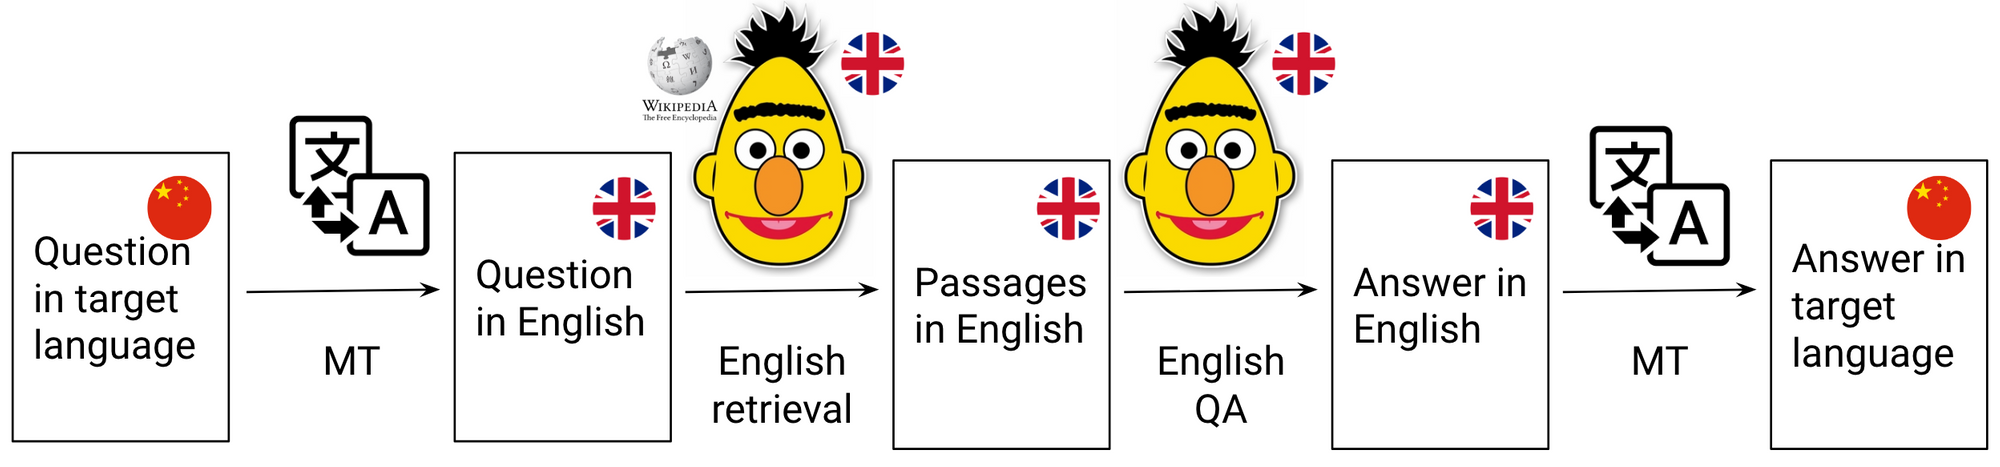

2. **도메인에 따른 데이터셋 활용**하여 fine-tuning 시도
> 1. Stanford Question Answering Dataset(SQuAD)는 다양한 도메인과 주제를 포괄하는 QA(질의응답) 데이터셋으로 알려져 있습니다. 그러나 특정 도메인의 경우 BERT와 같은 일반적인 사전 훈련된 언어 모델만으로는 충분하지 않을 수 있습니다. 대신, 대상 도메인 데이터에서 사전 훈련된 LM을 도메인 적응 형식으로 세밀하게 튜닝하는 것이 더 나은 결과를 낼 수 있습니다.
> 2. BioBERT, LegalBERT 등과 같은 모델들을 통해 도메인별 텍스트의 이러한 뉘앙스를 학습하여 도메인별 NLP 작업을 더 정확하게 수행할 수도 있습니다.
> *  예1) **BioBERT**: 생체 의료 도메인 코퍼스의 MLM(Masked Language Model)과 NSP(Next Sentence Prediction)의 목적에 대해 fine-tuning된 것입니다. 해당 도메인은 특정 용어들을 가지고 있는데, 이러한 용어는 일반 데이터셋에서 매우 드물게 나타날 수 있으며, 나타나더라도 다른 의미를 갖거나 다른 문맥을 암시할 수 있습니다.
> * 예2) **LegalBERT**: BERT 모델을 법률 도메인의 특수한 특성에 맞게 fine-tuning한 언어 모델입니다. LegalBERT는 법률 도메인의 독특한 용어, 어구, 문법 및 문맥을 고려하여 법률 문서에 대한 NLP 작업을 더 정확하게 수행할 수 있도록 학습됩니다.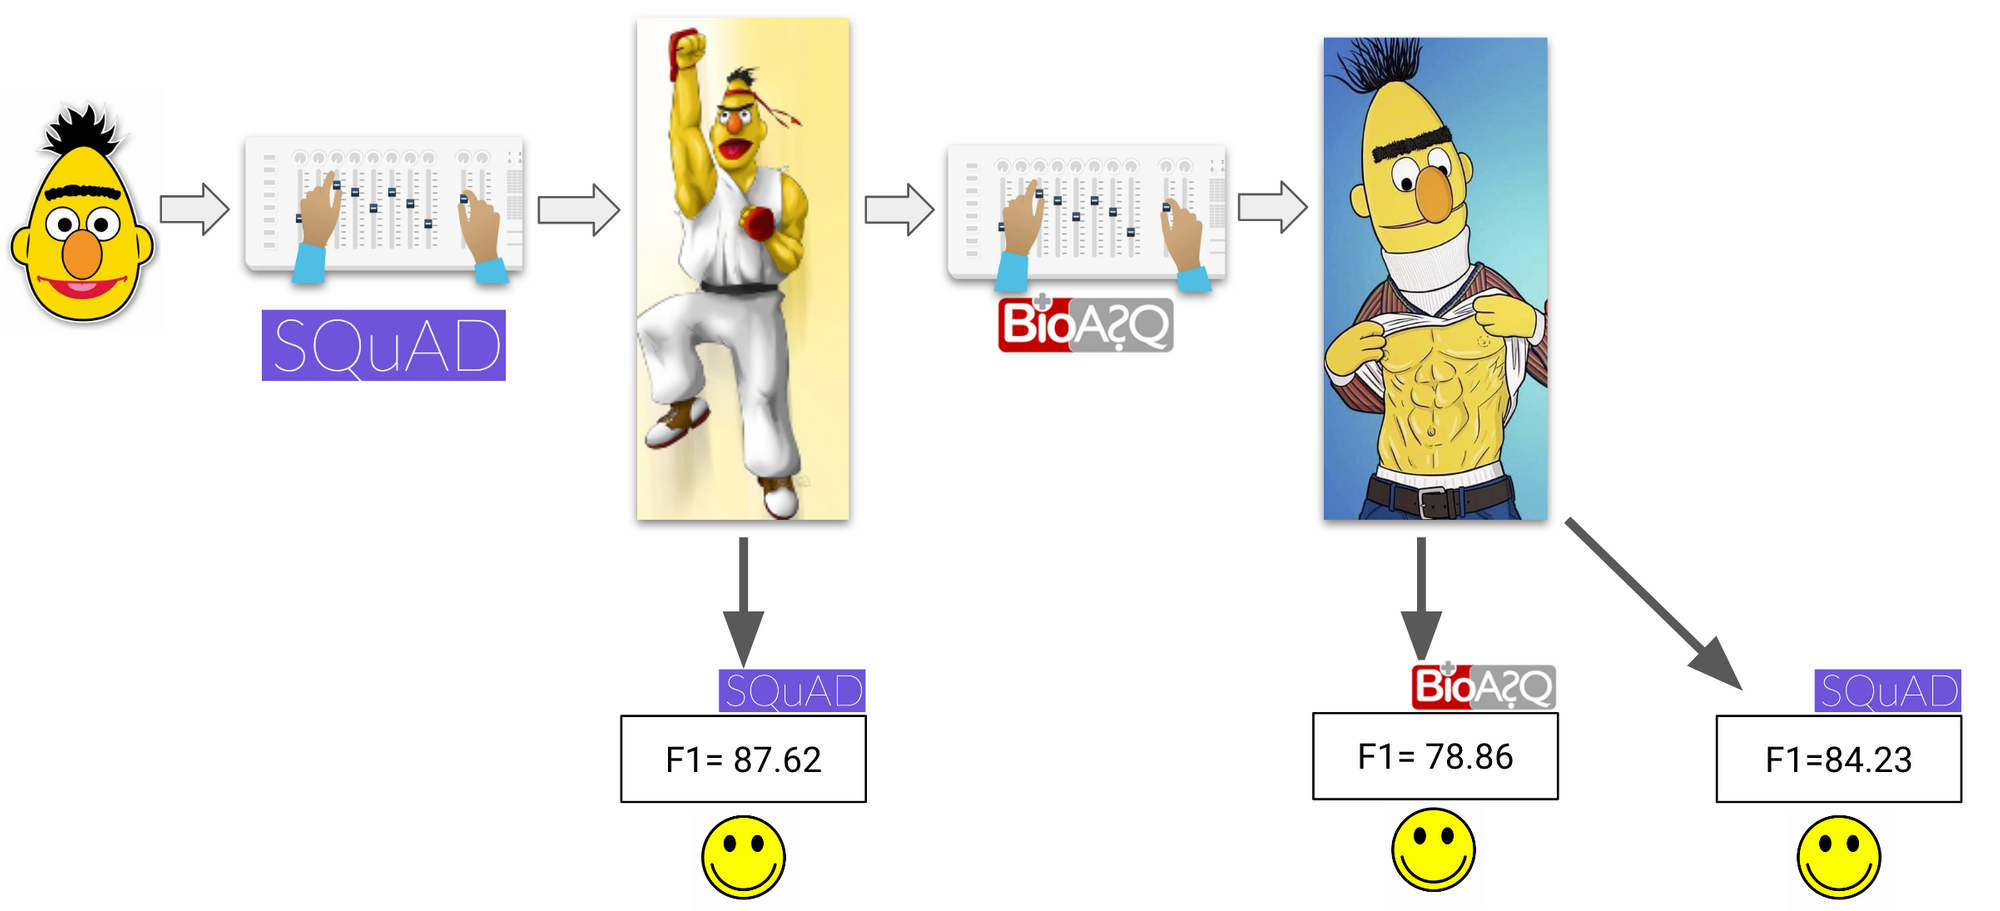

# **+) Part4. KorQuAD 데이터셋 활용 한국어 QA Task**

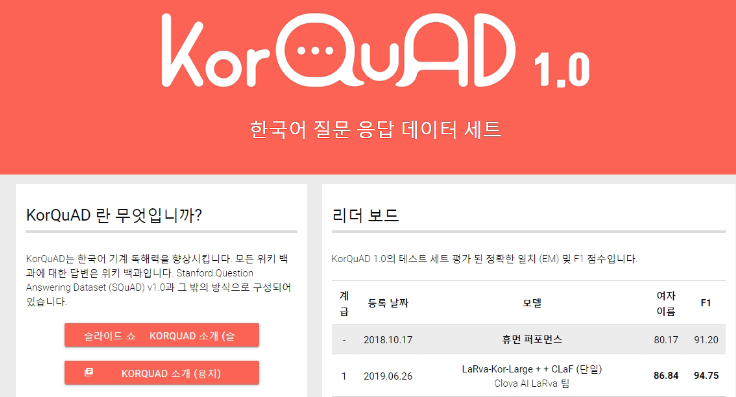

* **KorQuAD?**
> 1. KorQuAD(Korean Question Answering Dataset, https://korquad.github.io/)는 한국어 질문 응답(Question Answering) 작업을 위한 대표적인 데이터셋입니다. 스탠포드 대학과 카카오가 공동으로 개발한 이 데이터셋은 SQuAD(Stanford Question Answering Dataset)의 한국어 버전으로서, 영어권에서 널리 사용되는 SQuAD와 유사한 형태를 가지고 있습니다.
> 2. KorQuAD 데이터셋은 다양한 주제와 도메인에서 수집된 한국어 문서와 그에 대한 질문, 그리고 질문에 대한 정답으로 구성되어 있습니다. 각 데이터 포인트는 문서, 질문, 정답으로 이루어져 있으며, 문서는 여러 개의 문단(paragraph)으로 구성되고, 문단은 문장으로 나누어져 있습니다.
> 3. KorQuAD 데이터셋은 한국어 질문 응답 모델의 학습과 평가를 위한 중요한 자원으로 활용되고 있으며, 한국어 기계 이해력의 발전과 관련 연구와 모델의 개발에 널리 사용되고 있습니다.

* **KorQuAD 1.0과 2.0의 차이**
> 1. KorQuAD 1.0은 단일 정답을 가지는 QA 데이터셋입니다. 각 질문에는 하나의 정답이 주어지고, 모델은 해당 정답을 예측해야 합니다. 반면에 KorQuAD 2.0은 단일 정답 뿐만 아니라 "정답이 없음"을 나타내는 "impossible" 정답도 포함하고 있습니다. 따라서 모델은 문맥을 고려하여 해당 질문에 대한 답변이 없음을 나타내는 것도 배울 수 있어야 합니다.
> 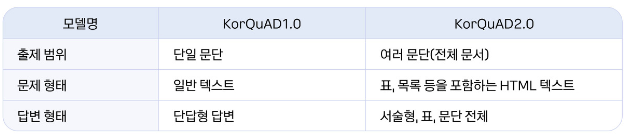

In [ ]:
# gpu 잡히는지 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6356176741957078993
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13810597888
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6310128139704745286
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# **1. QA pipeline 이용한 한국어 QA 확인**

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering, QuestionAnsweringPipeline
import tensorflow as tf
import tqdm.notebook
import math

In [ ]:
model = TFAutoModelForQuestionAnswering.from_pretrained('beomi/kcbert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained('beomi/kcbert-base')

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

Some weights or buffers of the TF 2.0 model TFBertForQuestionAnswering were not initialized from the PyTorch model and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# QA pipeline 세팅
qa = QuestionAnsweringPipeline(model=model, tokenizer=tokenizer)

In [ ]:
context = '윤여정은 1966년 연극 배우로 연기 경력을 시작하였고, 2021년 영화 《미나리》의 순자 역으로 아카데미 여우조연상을 수상했다.'

In [ ]:
question = '윤여정의 직업은?'

In [ ]:
qa(question=question, context=context)

{'score': 0.002835974795743823, 'start': 42, 'end': 50, 'answer': '미나리》의 순자'}

In [ ]:
qa(question='윤여정은 2021년 무엇을 했나?', context=context)

{'score': 0.00298137404024601, 'start': 42, 'end': 50, 'answer': '미나리》의 순자'}

In [ ]:
qa(question='윤여정의 미나리에서의 역할은?', context=context)

{'score': 0.002702058292925358, 'start': 42, 'end': 50, 'answer': '미나리》의 순자'}

# **2. KorQuad QA fine-tunning**

In [ ]:
model = TFAutoModelForQuestionAnswering.from_pretrained('beomi/kcbert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained('beomi/kcbert-base')

All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

Some weights or buffers of the TF 2.0 model TFBertForQuestionAnswering were not initialized from the PyTorch model and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering, QuestionAnsweringPipeline
import tensorflow as tf
import urllib.request
import json

In [ ]:
# korquad dataset download

urllib.request.urlretrieve('https://korquad.github.io/dataset/KorQuAD_v1.0_train.json', 'korquad.json')

('korquad.json', <http.client.HTTPMessage at 0x7f4bb56d3550>)

In [ ]:
korquad = json.load(open('korquad.json', encoding='utf8'))

In [ ]:
korquad['data'][0]

{'paragraphs': [{'qas': [{'answers': [{'text': '교향곡', 'answer_start': 54}],
     'id': '6566495-0-0',
     'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'},
    {'answers': [{'text': '1악장', 'answer_start': 421}],
     'id': '6566495-0-1',
     'question': '바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?'},
    {'answers': [{'text': '베토벤의 교향곡 9번', 'answer_start': 194}],
     'id': '6566495-0-2',
     'question': '바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?'},
    {'answers': [{'text': '파우스트', 'answer_start': 15}],
     'id': '6566518-0-0',
     'question': '1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?'},
    {'answers': [{'text': '합창교향곡', 'answer_start': 354}],
     'id': '6566518-0-1',
     'question': '파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?'},
    {'answers': [{'text': '1839', 'answer_start': 0}],
     'id': '5917067-0-0',
     'question': '바그너가 파우스트를 처음으로 읽은 년도는?'},
    {'answers': [{'text': '파리', 'answer_start': 410}],
     'id': '5917067-0-1',
     'question': '바그너가 처음 교향곡 작곡을 한 장소는?'},
    {'answers': [{'text': '드레스덴', 'answer_sta

In [ ]:
para = korquad['data'][0]['paragraphs'][0]
para

{'qas': [{'answers': [{'text': '교향곡', 'answer_start': 54}],
   'id': '6566495-0-0',
   'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'},
  {'answers': [{'text': '1악장', 'answer_start': 421}],
   'id': '6566495-0-1',
   'question': '바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?'},
  {'answers': [{'text': '베토벤의 교향곡 9번', 'answer_start': 194}],
   'id': '6566495-0-2',
   'question': '바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?'},
  {'answers': [{'text': '파우스트', 'answer_start': 15}],
   'id': '6566518-0-0',
   'question': '1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?'},
  {'answers': [{'text': '합창교향곡', 'answer_start': 354}],
   'id': '6566518-0-1',
   'question': '파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?'},
  {'answers': [{'text': '1839', 'answer_start': 0}],
   'id': '5917067-0-0',
   'question': '바그너가 파우스트를 처음으로 읽은 년도는?'},
  {'answers': [{'text': '파리', 'answer_start': 410}],
   'id': '5917067-0-1',
   'question': '바그너가 처음 교향곡 작곡을 한 장소는?'},
  {'answers': [{'text': '드레스덴', 'answer_start': 534}],
   'id': '5917067-0-2',
   'question': '바그너의 1

In [ ]:
# passage 지문
para['context']

'1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.'

In [ ]:
# 질문과 답
qas = para['qas'][0]
qas

{'answers': [{'text': '교향곡', 'answer_start': 54}],
 'id': '6566495-0-0',
 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'}

In [ ]:
inputs = tokenizer(para['context'],
                   qas['question'],
                   truncation=True,
                   max_length=tokenizer.model_max_length,
                   return_tensors='tf')
inputs

{'input_ids': <tf.Tensor: shape=(1, 300), dtype=int32, numpy=
array([[    2,  8601,  4633, 29697,  1480,  4313,  4538,  4008,   336,
         4065,  4042,  3231, 23243,  4104,  4027,  8793, 13985,   391,
         9132,  4113, 10966, 11728, 12023, 14657,  4091,  8598, 16639,
          341,  4573,  4771,  4027,  2139,  8478, 14416,   214,  8202,
           17,  2451, 13007,  1480,  4313,  4538,  4008,  8601,  4633,
        22903,  4113,  1676,   868,  4913,  7965,  1789,  4203,  4110,
        15031,   786,   250,  4057, 10878,  4007,  2593,  4094,  4128,
        10289,  4113, 10958,  4062,  9511,  1355,  4600,  4103,  4775,
         5602, 10770,  4180, 26732,  3231, 23243,  4104,  4042,  2015,
         4012,  4113,  9198,  8763,  8129,    17, 10384, 23008,  7971,
         2170,  4408,  4011,  4147,  4042, 17015,  4091, 23008, 21056,
         4165,   323,  4175,  4158, 11413,  2273,  4043,  7966,  1543,
         4775,  4170,  4042,   341,  4573,  4771,    28,  4566,  4027,
        10599, 

In [ ]:
q = qas['answers'][0]

# 글자의 위치
start_char = q['answer_start']
end_char = start_char + len(q['text']) - 1

# 토큰의 위치
start = inputs.char_to_token(0, start_char)
end = inputs.char_to_token(0, end_char)

In [ ]:
# 글자의 위치
print(start_char)
print(end_char)

54
56


In [ ]:
# 토큰의 위치
print(start)
print(end)

27
29


In [ ]:
inputs['input_ids']

<tf.Tensor: shape=(1, 300), dtype=int32, numpy=
array([[    2,  8601,  4633, 29697,  1480,  4313,  4538,  4008,   336,
         4065,  4042,  3231, 23243,  4104,  4027,  8793, 13985,   391,
         9132,  4113, 10966, 11728, 12023, 14657,  4091,  8598, 16639,
          341,  4573,  4771,  4027,  2139,  8478, 14416,   214,  8202,
           17,  2451, 13007,  1480,  4313,  4538,  4008,  8601,  4633,
        22903,  4113,  1676,   868,  4913,  7965,  1789,  4203,  4110,
        15031,   786,   250,  4057, 10878,  4007,  2593,  4094,  4128,
        10289,  4113, 10958,  4062,  9511,  1355,  4600,  4103,  4775,
         5602, 10770,  4180, 26732,  3231, 23243,  4104,  4042,  2015,
         4012,  4113,  9198,  8763,  8129,    17, 10384, 23008,  7971,
         2170,  4408,  4011,  4147,  4042, 17015,  4091, 23008, 21056,
         4165,   323,  4175,  4158, 11413,  2273,  4043,  7966,  1543,
         4775,  4170,  4042,   341,  4573,  4771,    28,  4566,  4027,
        10599, 18907,   208, 

In [ ]:
# 정답을 텍스트로 변환

tokenizer.decode(inputs['input_ids'].numpy()[0, start:end+1])

'교향곡'

In [ ]:
inputs['start_positions'] = [start] # 정답 시작 토큰
inputs['end_positions'] = [end] # 정답 끝나는 부분 토큰

In [ ]:
def int_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

def make_inputs(context, qas):
    inputs = tokenizer(
        context,
        qas['question'],
        truncation=True,
        max_length=tokenizer.model_max_length)
    q = qas['answers'][0]
    start_char = q['answer_start']
    end_char = start_char + len(q['text']) - 1
    start = inputs.char_to_token(0, start_char)
    end = inputs.char_to_token(0, end_char)
    inputs['start_positions'] = [start]
    inputs['end_positions'] = [end]
    return inputs

In [ ]:
%%time
n = 0
filename = 'korquad.tfrecord'
with tf.io.TFRecordWriter(filename) as writer:
    for item in korquad['data']:   # 각 아이템 순환
        for para in item['paragraphs']:  # 아이템마다
            context = para['context']
            for qas in para['qas']:
                inputs = make_inputs(context, qas)
                if inputs['start_positions'][0] and inputs['end_positions'][0]:
                    feature = {k: int_feature(v) for k, v in inputs.items()}
                    example = tf.train.Example(features=tf.train.Features(feature=feature))
                    s = example.SerializeToString()
                    writer.write(s)
                    n += 1

CPU times: user 1min 21s, sys: 568 ms, total: 1min 21s
Wall time: 1min 50s


In [ ]:
n

57653

In [ ]:
int_seq = tf.io.FixedLenSequenceFeature(shape=(), dtype=tf.int64, allow_missing=True)
int_value = tf.io.FixedLenFeature(shape=(), dtype=tf.int64)
feature_description = {
    'input_ids': int_seq,
    'token_type_ids': int_seq,
    'attention_mask': int_seq,
    'start_positions': int_value,
    'end_positions': int_value
}

In [ ]:
def preproc(example):
    example = tf.io.parse_single_example(example, feature_description)
    example = {k : tf.cast(v, tf.int32) for k, v in example.items()}
    return example

# **3. KorQuad Dataset load & training**

In [ ]:
# korquad 데이터셋 불러오기
dataset = tf.data.TFRecordDataset(['korquad.tfrecord']).map(preproc).padded_batch(8)
batch = next(iter(dataset))
result = model(batch)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Optional dependency 'langdetect' was used but it isn't installed.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Optional dependency 'langdetect' was used but it isn't installed.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
%%time
# 옵티마이저: adam
opt = tf.keras.optimizers.Adam(learning_rate=5e-5)

n = 57653
for batch in tqdm.notebook.tqdm(dataset, total=math.ceil(n / 32)):
    with tf.GradientTape() as tape:
        result = model(batch)
        loss = tf.reduce_mean(result['loss'])
    grads = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables)) # loss가 감소하는 방향으로 파라미터 업데이트

  0%|          | 0/1802 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Optional dependency 'langdetect' was used but it isn't installed.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Optional dependency 'langdetect' was used but it isn't installed.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


CPU times: user 1h 21min 45s, sys: 1min 5s, total: 1h 22min 50s
Wall time: 1h 41min 21s


In [ ]:
model

In [ ]:
context = '윤여정은 1966년 연극 배우로 연기 경력을 시작하였고, 2021년 영화 《미나리》의 순자 역으로 아카데미 여우조연상을 수상했다.'

In [ ]:
def qa(question, context):
    inputs = tokenizer(context, question, add_special_tokens=True, return_tensors="tf")
    outputs = model(inputs)
    start = tf.argmax(outputs.start_logits, axis=1).numpy()[0]
    end = tf.argmax(outputs.end_logits, axis=1).numpy()[0]
    return tokenizer.decode(inputs['input_ids'][0, start:end+1])

In [ ]:
qa('윤여정은 언제 데뷔했나?', context)

'1966년'

In [ ]:
qa('윤여정의 직업은?', context)

'연극 배우'

In [ ]:
qa('윤여정이 2021년 받은 상은?', context)

'미나리 [UNK] 의 순자 역으로 아카데미 여우조연상을'

In [ ]:
qa('윤여정이 미나리에서 맡았던 역할은?', context)

'아카데미 여우조연상을'

In [ ]:
qa('윤여정은 2021년 무엇을 했는가?', context)

'미나리'

In [ ]:
qa('윤여정이 미나리에서 맡았던 배역은?', context)

'아카데미 여우조연상을'

In [ ]:
context = '텍스트 마이닝은 텍스트 데이터에서 유용한 정보를 추출하고 분석하는 기술입니다. 초기에는 정보 검색과 텍스트 분류에 초점을 맞추었으며, 1990년대부터 점차적으로 연구와 발전이 이루어졌습니다. 텍스트 마이닝은 자연어 처리, 기계 학습, 통계 분석 등 다양한 기술과 방법을 활용하여 텍스트 데이터를 이해하고 가치 있는 인사이트를 도출하는 과정을 의미합니다. 텍스트 마이닝은 대량의 텍스트 데이터를 다룰 수 있어 정보를 손쉽게 추출하고 분석할 수 있는 장점이 있습니다.'

In [ ]:
def qa(question, context):
    inputs = tokenizer(context, question, add_special_tokens=True, return_tensors="tf")
    outputs = model(inputs)
    start = tf.argmax(outputs.start_logits, axis=1).numpy()[0]
    end = tf.argmax(outputs.end_logits, axis=1).numpy()[0]
    return tokenizer.decode(inputs['input_ids'][0, start:end+1])

In [ ]:
qa('텍스트 마이닝이 어떤 기술인가?', context)

'유용한 정보를 추출하고 분석'

In [ ]:
qa('텍스트 마이닝은 언제 등장했나?', context)

'1990년대'

In [ ]:
qa('텍스트 마이닝은 무엇을 의미하나?', context)

'가치 있는 인사이트'

In [ ]:
qa('텍스트 마이닝의 가장 큰 장점은?', context)

''

# **마치며**

직접 실제 모델 학습을 진행해 본 결과 다양한 것들을 배울 수 있었으며, KorQuAD 데이터셋은 한국어 QA 작업을 위한 중요한 데이터셋이지만, 몇 가지 한계점이 존재한다는 것 역시 알 수 있었습니다.

* **KorQuAD의 한계**
> 1. **데이터 양과 다양성**: KorQuAD 데이터셋은 상대적으로 작은 규모의 데이터셋에 해당합니다. 데이터의 양이 충분하지 않을 수 있으며, 다양한 주제, 도메인 및 언어 스타일을 충분히 반영하지 못할 수 있습니다. 이는 모델이 실제 다양한 상황에서의 질문 응답 작업에 대한 일반화 능력, 유연한 답변 능력을 제한할 수 있습니다.
> 2. **문서 구조와 질문 유형의 한정성**: KorQuAD 데이터셋은 일반적으로 문서의 하나의 문단에 대한 질문과 답변으로 구성됩니다. 이는 모델이 문서 전체의 문맥을 이해하고 질문에 대한 답변을 제공하는 능력을 평가하기 어렵게 만들 수 있습니다. 또한 특정 유형의 질문이나 다양한 문서 구조를 다루는 능력에 대한 평가가 부족할 수 있습니다. 질문을 할 때도 해당 질문의 주어와 의미하는 바를 정확하게 서술해야만 그나마 모델이 답변을 유추해 낼 수 있었습니다.
> 3. **답변의 한계**: KorQuAD 데이터셋은 정답이 주어진 텍스트 스패닝 형태로 제공됩니다. 이는 모델이 정확한 텍스트 스패닝을 예측하는 능력에 집중하게 만듭니다. 그러나 정확한 텍스트 스패닝이 없거나 문맥에 따라 답변이 다를 수 있는 경우에는 모델의 성능에 영향을 미칠 수 있습니다. 실제로 학습 진행해 본 결과, context에 정확한 답변이 존재하지 않는 경우 모델이 답변을 예측하지 못했습니다
> 4. **개체명 인식과 복잡한 구문 처리의 한계**: KorQuAD 데이터셋은 개체명 인식과 같은 추가적인 문맥 정보나 복잡한 구문 처리를 요구하지 않습니다. 실제 학습 진행 결과, 동일 context 안에서 충분히 답을 유추해 낼 수 있는 질문임에도 불구하고 주어를 명확하게 인식하지 못해 **모델이 답변을 예측해 내지 못한 것을 발견**하였습니다. (ex. 텍스트 마이닝의 가장 큰 장점은?) 하지만 실제 응용에서는 이러한 기능이 중요할 수 있으며, 모델이 개체명을 인식하고 문맥을 이해하여 더 정확한 답변을 제공하는 능력이 필요할 수 있습니다.

👉 이러한 한계를 극복하기 위해서는 더 다양하고 대규모의 한국어 QA 데이터셋을 수집하고 활용하거나, KorQuAD 데이터셋을 보완하거나 확장하는 연구가 필요합니다. 또한 다른 언어와 도메인에 대한 다양한 QA 데이터셋을 활용하여 모델의 일반화 능력을 향상시킬 수 있을 것입니다.

* **과제하며 느낀 점**
> 1. **GPU 사용의 어려움**: GPU로 실행하려고 시도했으나 런타임 다운으로 인해 CPU를 사용해 모델을 학습했습니다. 그 결과 모델 훈련 시간이 길어졌고, 에포크를 여러 번 돌려보지 못한 점이 아쉬웠습니다. GPU는 대규모 모델과 데이터셋을 처리하는 데 효율적이므로 GPU 리소스를 이용할 수 있다면 모델 학습 속도가 향상될 것입니다.
> 2. **평가 지표의 이해와 해석**: 모델의 성능을 정량적으로 평가하기 위해 평가 지표를 사용해야 합니다. Question Answering Task에서는 주로 정확도(Accuracy)와 F1 점수를 평가 지표로 사용합니다. 이러한 평가 지표를 이해하고 해석하는 것이 중요합니다. 모델의 성능을 개선하기 위해 평가 결과를 분석하고, 어떤 부분에서 오답이 발생했는지 파악하여 모델을 개선하는 방향으로 접근해야 합니다. 따라서 평가 지표에 대한 공부가 더 필요하겠다는 생각을 하였습니다.
> 3. **hugging face의 편리성**: Hugging Face가 사전 훈련된 모델 제공, 다양한 언어 지원, 간편한 모델 로딩 및 사용, Fine-tuning 지원 (SEP 구분 자동으로 실행), 관련 도구와 라이브러리 제공 (데이터 전처리, 모델 평가 및 설계 분석) 등 많은 혜택을 제공하는 오픈 소스 라이브러리라는 점 체감해 볼 수 있었습니다.
> 3. **NLP의 발전 체감**: 이 과제를 통해 NLP 기술의 발전을 직접 체험할 수 있었습니다. BERT 모델과 같은 언어 모델의 등장으로 자연어 처리 작업의 성능이 크게 향상되었으며, 앞으로도 더 정확하고 유용한 자연어 이해 및 생성 시스템의 지속적인 발전이 이루어질 것으로 기대됩니다.

# **참고 출처**

* https://www.kaggle.com/code/kabure/qa-eda-and-nlp-modelling-insights-vis-bert
* https://www.kaggle.com/code/jonathanbesomi/question-answering-starter-pack
* https://www.ruder.io/multi-qa-tutorial/#datasets-for-multi-domain-qa
* https://www.kaggle.com/code/arunmohan003/question-answering-using-bert/notebook
* https://zzcojoa.tistory.com/91
* https://juwon2021.tistory.com/389